Suppressing Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

Importing Pandas and NumPy and graphs library

In [2]:
import pandas as pd, numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Importing lead dataset

In [4]:
lead_data = pd.read_csv("Leads.csv")

In [5]:
print(lead_data.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

Exploring dataset

In [6]:
print('Shape of lead dataset')
print(lead_data.shape)

Shape of lead dataset
(9240, 37)


In [7]:
print('Lead dataset info')
print(lead_data.info())

Lead dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit              

Describing data

In [8]:
print(lead_data.describe())

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

Converting 'Select' values to NaN.

In [9]:
lead_data = lead_data.replace('Select', np.nan)
# checking the columns for null values
print(lead_data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Finding the null percentages across columns

In [10]:
null_percentage = (lead_data.isnull().sum() / len(lead_data)) * 100
null_percentage_df = pd.DataFrame({'Column_Name': null_percentage.index, 'Null_Percentage': null_percentage.values})
filtered_data = null_percentage_df[null_percentage_df['Null_Percentage'] > 40]
print(filtered_data)

                           Column_Name  Null_Percentage
13  How did you hear about X Education        78.463203
25                        Lead Quality        51.590909
28                        Lead Profile        74.188312
30         Asymmetrique Activity Index        45.649351
31          Asymmetrique Profile Index        45.649351
32         Asymmetrique Activity Score        45.649351
33          Asymmetrique Profile Score        45.649351


dropping columns with high percentage of nulls (>40%)

In [11]:
lead_data=lead_data.drop(columns=filtered_data['Column_Name'].tolist())

looking null percentage again

In [12]:
null_percentage = (lead_data.isnull().sum() / len(lead_data)) * 100
print(null_percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

curing data with default/mode values as required

Checking column 'Specialization'

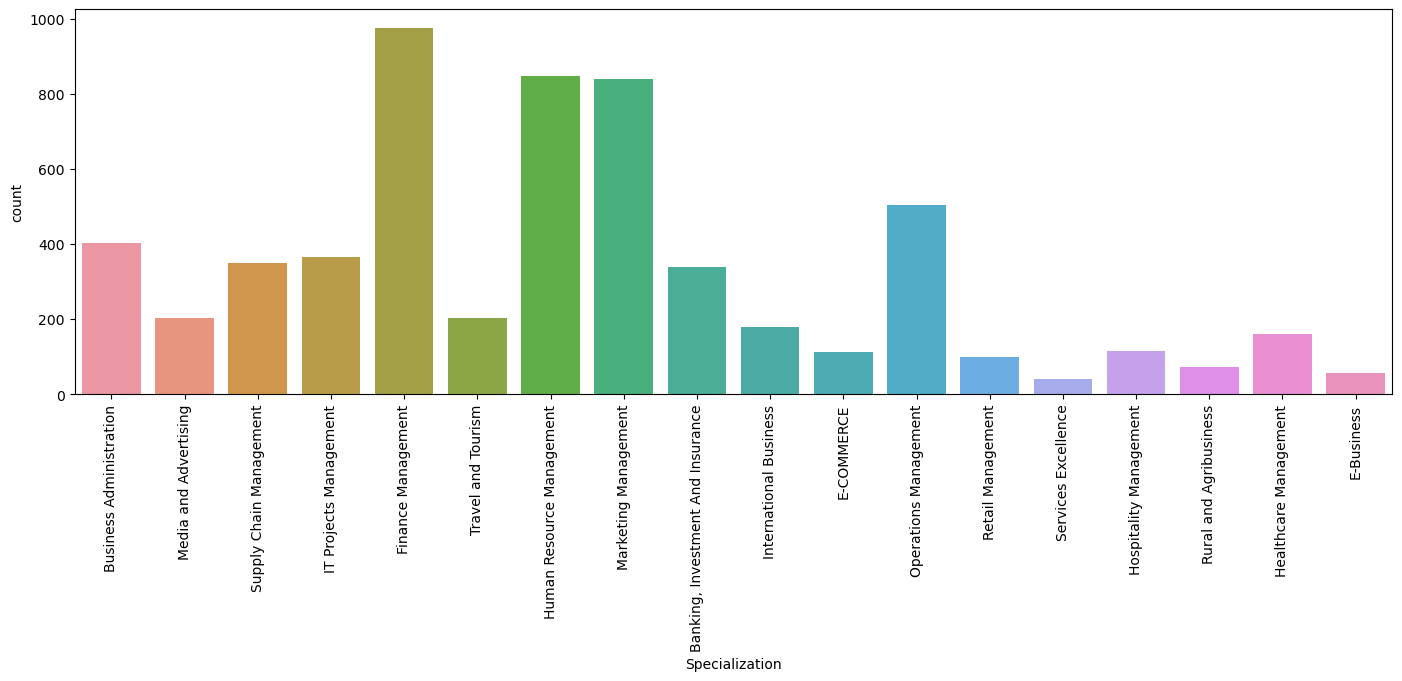

In [13]:
plt.figure(figsize=(17,5),label='(1.a) [Specialization] before imputing')
sns.countplot(data=lead_data, x='Specialization')
plt.xticks(rotation=90)
plt.show()

setting nulls to 'Others'

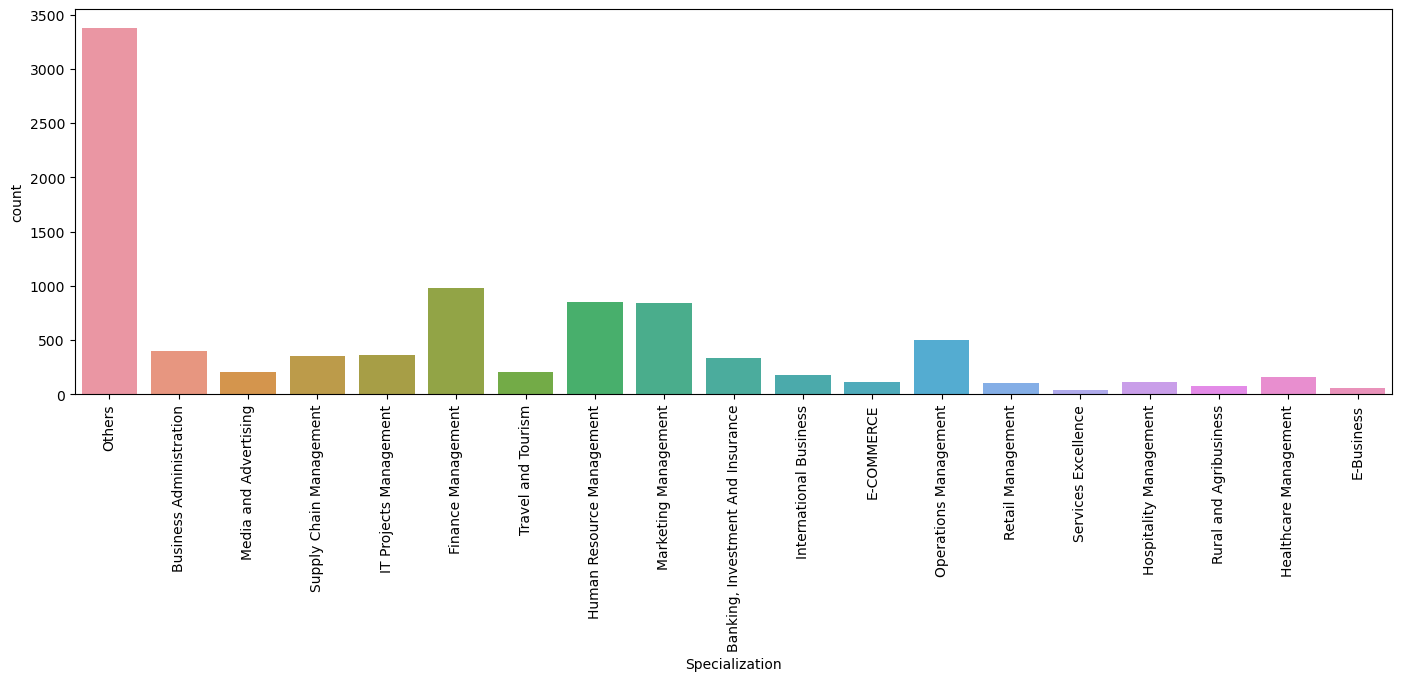

In [14]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(17,5),label='(1.b) [Specialization] after imputing')
sns.countplot(data=lead_data, x='Specialization')
plt.xticks(rotation=90)
plt.show()

Checking columns 'Tags'

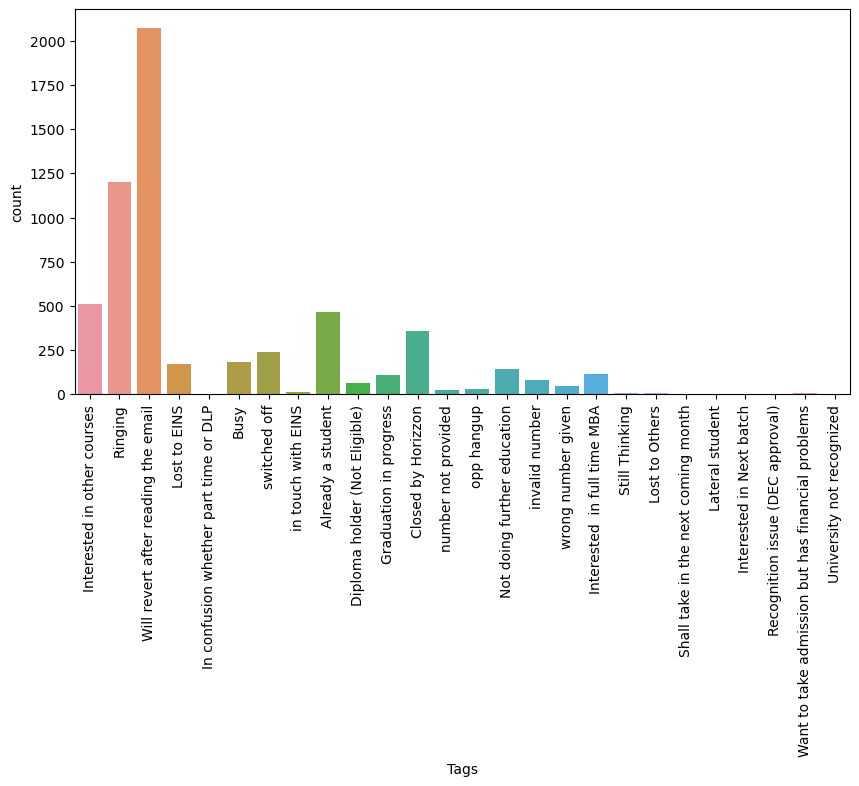

In [15]:
plt.figure(figsize=(10,5),label='(2.a) [Tags] before imputing')
sns.countplot(data=lead_data,x='Tags')
plt.xticks(rotation=90)
plt.show()

Imputing the missing data in the tags column with mode value of the column 'Will revert after reading the email'

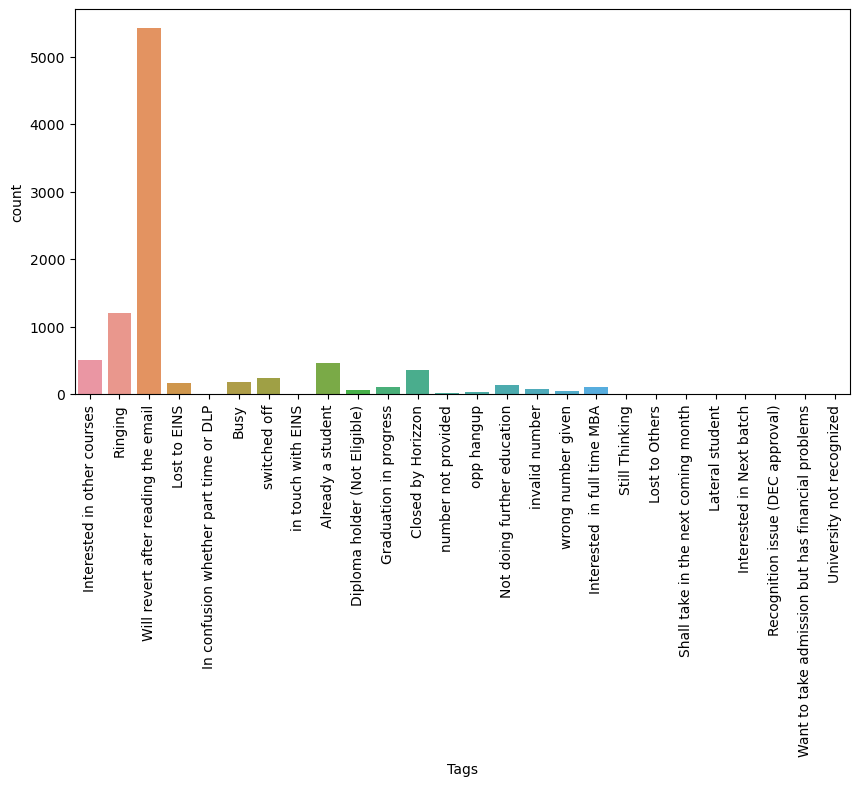

In [16]:
lead_data['Tags']=lead_data['Tags'].replace(np.nan,lead_data['Tags'].mode().iloc[0])
plt.figure(figsize=(10,5),label='(2.b) [Tags] after imputing')
sns.countplot(data=lead_data,x='Tags')
plt.xticks(rotation=90)
plt.show()

Checking column 'What matters most to you in choosing a course'

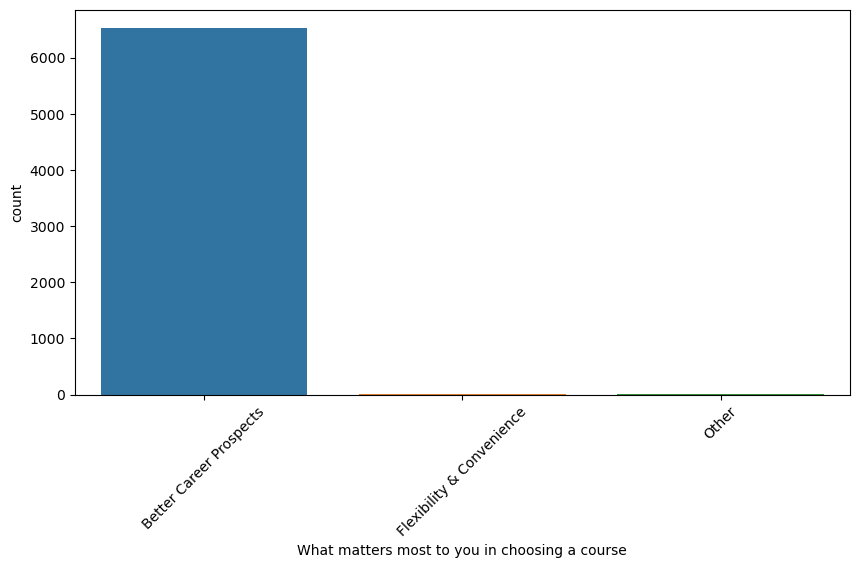

In [17]:
plt.figure(figsize=(10,5),label='(3) [What matters most to you in choosing a course]')
sns.countplot(data=lead_data,x='What matters most to you in choosing a course')
plt.xticks(rotation=45)
plt.show()

Since it is highly skewed column and is not very important, we could remove this

In [18]:
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

Column 'What is your current occupation'

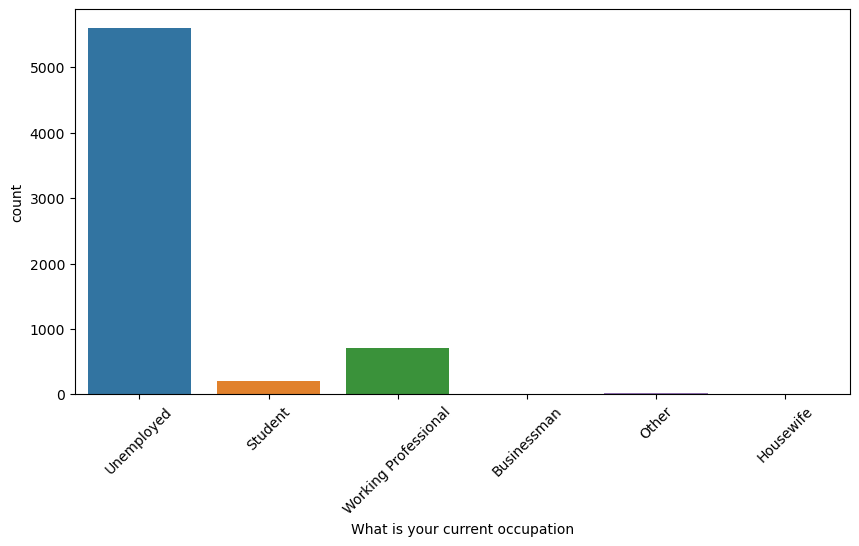

In [19]:
plt.figure(figsize=(10,5),label='(4.a) [What is your current occupation] before imputing')
sns.countplot(data=lead_data,x='What is your current occupation')
plt.xticks(rotation=45)
plt.show()

Since most values are as Unemployed we impute the missing values with mode

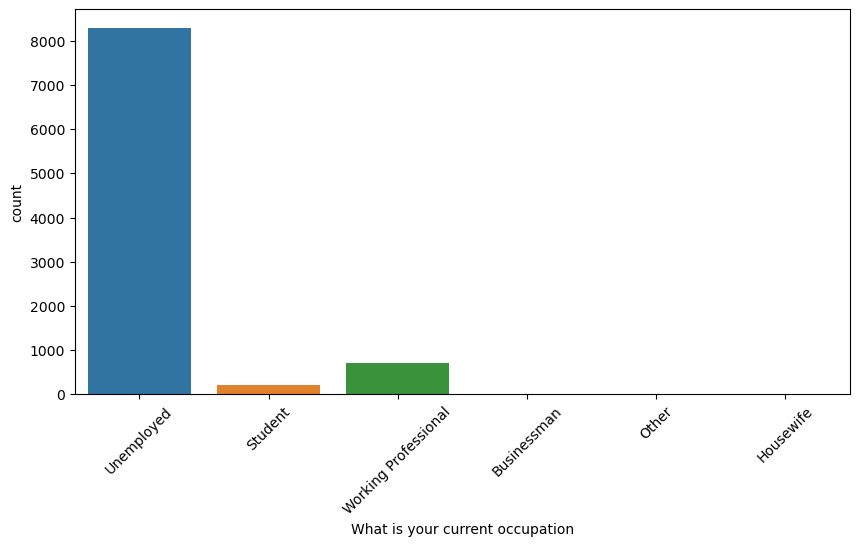

In [20]:
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,lead_data['What is your current occupation'].mode().iloc[0])
plt.figure(figsize=(10,5),label='(4.b) [What is your current occupation] after imputing')
sns.countplot(data=lead_data,x='What is your current occupation')
plt.xticks(rotation=45)
plt.show()

Column 'Country'

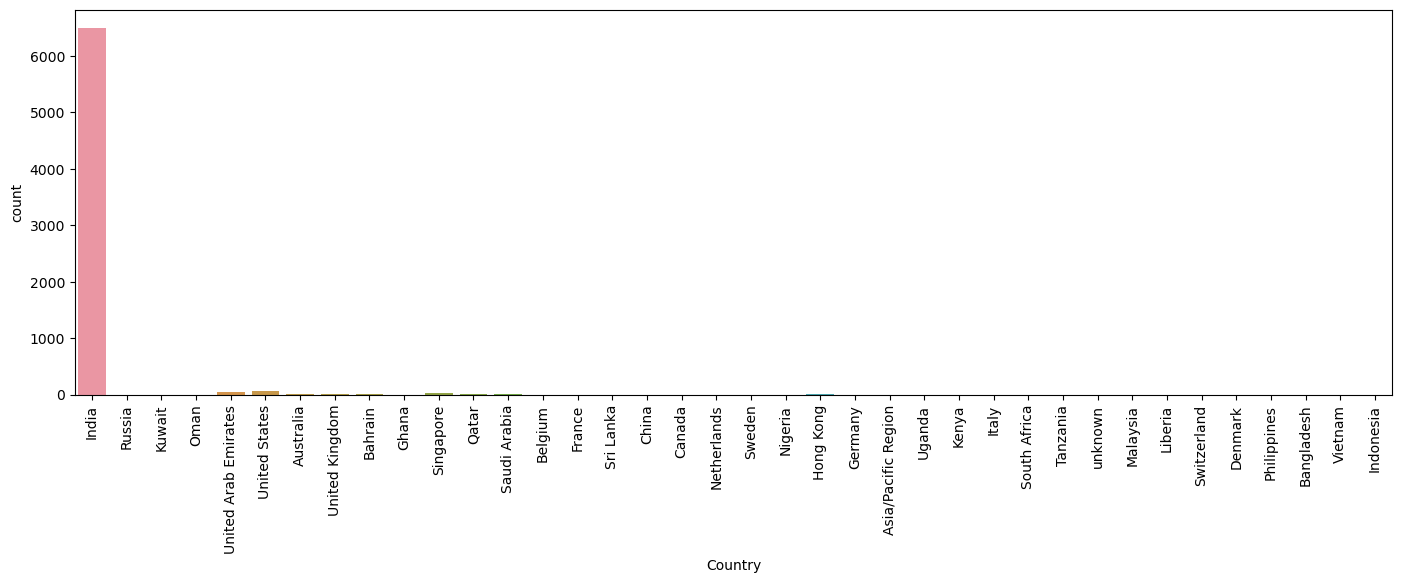

In [21]:
plt.figure(figsize=(17,5),label='(5.a) [Country] before imnputing')
sns.countplot(data=lead_data,x='Country')
plt.xticks(rotation=90)
plt.show()

Imputing with mode value

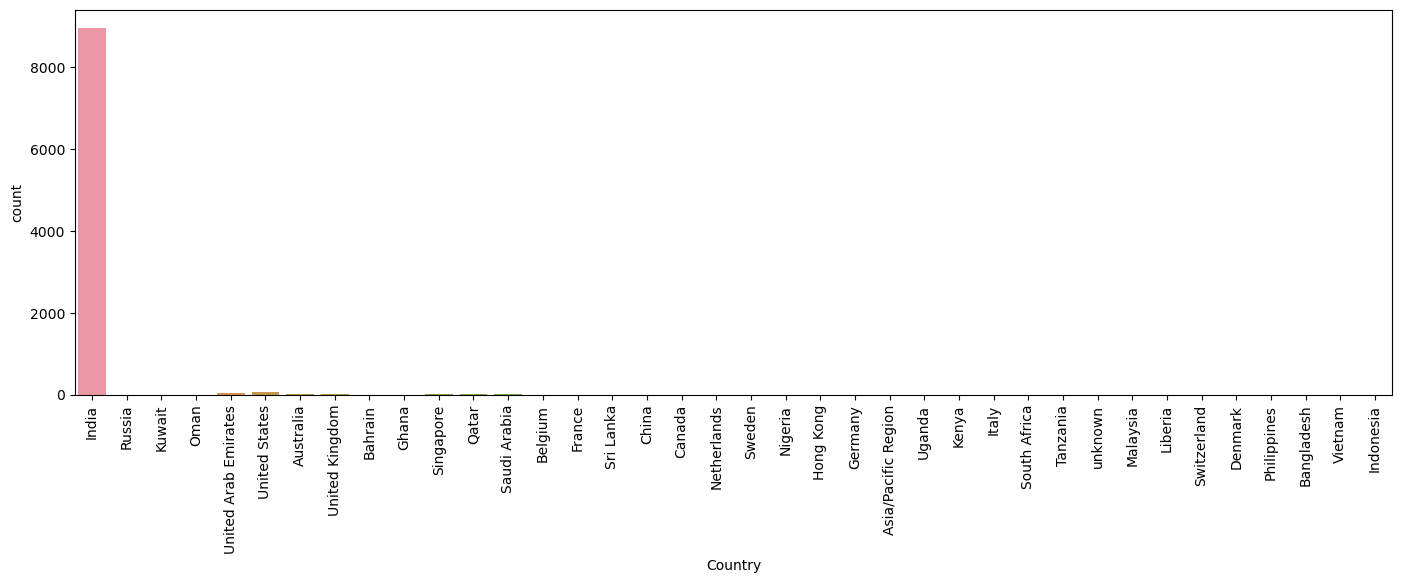

In [22]:
lead_data['Country']=lead_data['Country'].replace(np.nan,lead_data['Country'].mode().iloc[0])
plt.figure(figsize=(17,5),label='(5.a) [Country] after imputing')
sns.countplot(data=lead_data,x='Country')
plt.xticks(rotation=90)
plt.show()

olumn 'City'

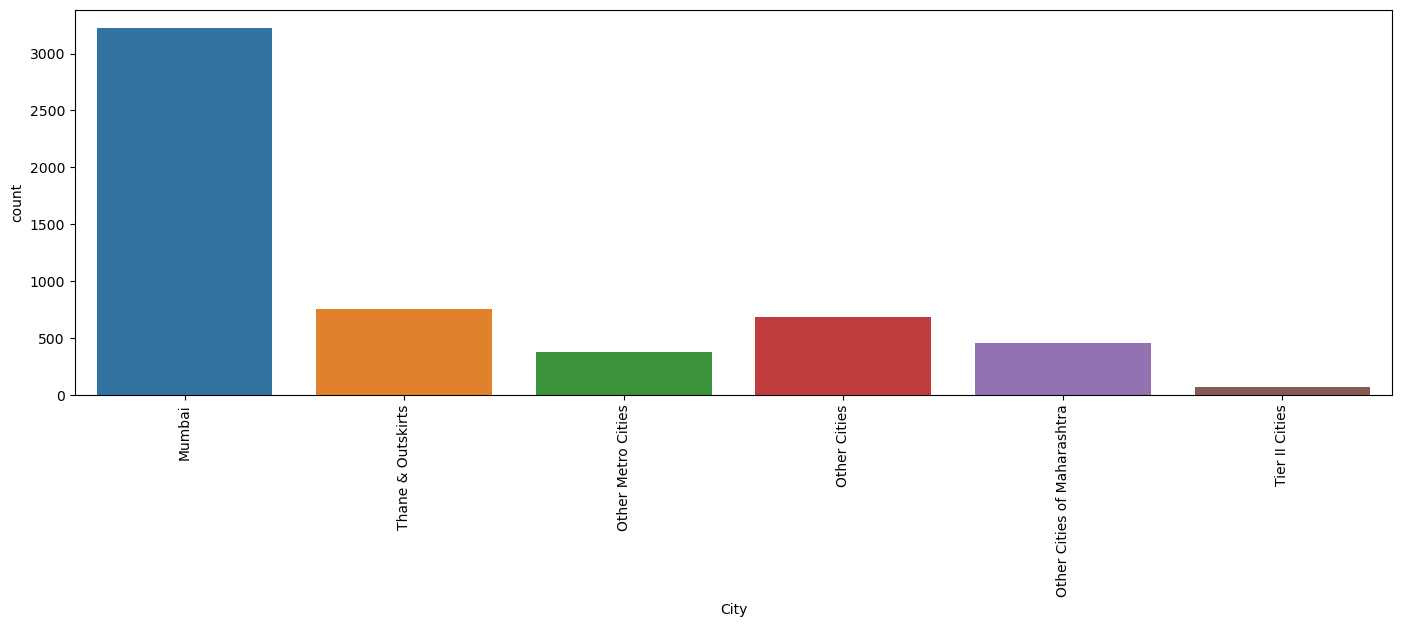

In [23]:
plt.figure(figsize=(17,5),label='(6.a) [City] before imputing')
sns.countplot(data=lead_data,x='City')
plt.xticks(rotation=90)
plt.show()

Imputing with mode value

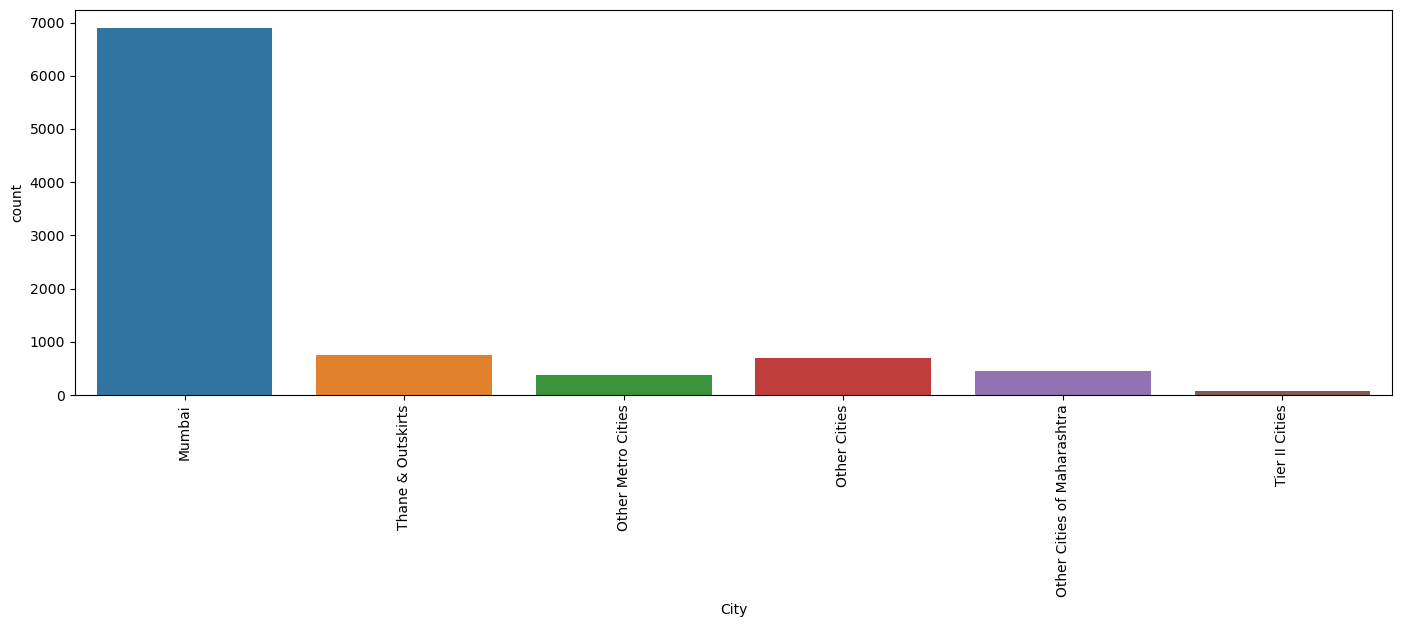

In [24]:
lead_data['City']=lead_data['City'].replace(np.nan,lead_data['City'].mode().iloc[0])
plt.figure(figsize=(17,5),label='(6.b) [City] after imputing')
sns.countplot(data=lead_data,x='City')
plt.xticks(rotation=90)
plt.show()

hecking null percentage again

In [25]:
null_percentage = (lead_data.isnull().sum() / len(lead_data)) * 100
null_percentage_df = pd.DataFrame({'Column_Name': null_percentage.index, 'Null_Percentage': null_percentage.values})
print(null_percentage_df)

                                 Column_Name  Null_Percentage
0                                Prospect ID         0.000000
1                                Lead Number         0.000000
2                                Lead Origin         0.000000
3                                Lead Source         0.389610
4                               Do Not Email         0.000000
5                                Do Not Call         0.000000
6                                  Converted         0.000000
7                                TotalVisits         1.482684
8                Total Time Spent on Website         0.000000
9                       Page Views Per Visit         1.482684
10                             Last Activity         1.114719
11                                   Country         0.000000
12                            Specialization         0.000000
13           What is your current occupation         0.000000
14                                    Search         0.000000
15      

Since rest missing values are under 2%, so we can drop these rows.

In [26]:
lead_data.dropna(inplace = True)
null_percentage = (lead_data.isnull().sum() / len(lead_data)) * 100
null_percentage_df = pd.DataFrame({'Column_Name': null_percentage.index, 'Null_Percentage': null_percentage.values})
print(null_percentage_df)

                                 Column_Name  Null_Percentage
0                                Prospect ID              0.0
1                                Lead Number              0.0
2                                Lead Origin              0.0
3                                Lead Source              0.0
4                               Do Not Email              0.0
5                                Do Not Call              0.0
6                                  Converted              0.0
7                                TotalVisits              0.0
8                Total Time Spent on Website              0.0
9                       Page Views Per Visit              0.0
10                             Last Activity              0.0
11                                   Country              0.0
12                            Specialization              0.0
13           What is your current occupation              0.0
14                                    Search              0.0
15      

Percentage of rows retained 

In [27]:
print('Percentage of rows retained :',(len(lead_data.index)/9240)*100)

Percentage of rows retained : 98.2034632034632


Checking for duplicates

In [28]:
print(lead_data[lead_data.duplicated()])

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, What is your current occupation, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 29 columns]


Univariate Analysis

In [29]:
print("Performing univariate and bivariate analysis")

Performing univariate and bivariate analysis


Column [Converted]

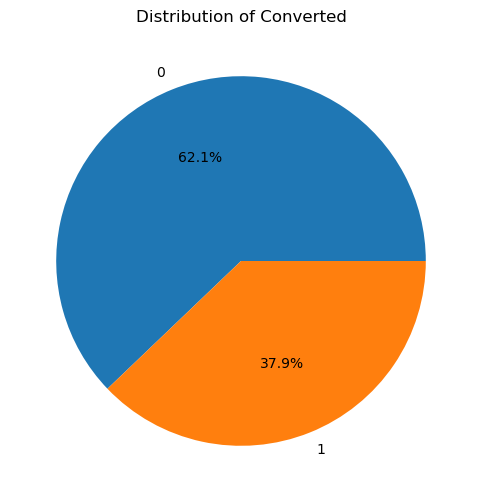

Inference The lead conversion rate is  38


In [30]:
plt.figure(figsize=(6, 6), label='(7) Distribution of column [Converted]')
plt.pie(lead_data['Converted'].value_counts(), labels=lead_data['Converted'].unique(), autopct='%1.1f%%')
plt.title("Distribution of Converted")
plt.show()
print("Inference The lead conversion rate is ",round((sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100))

Columns [Lead Origin]

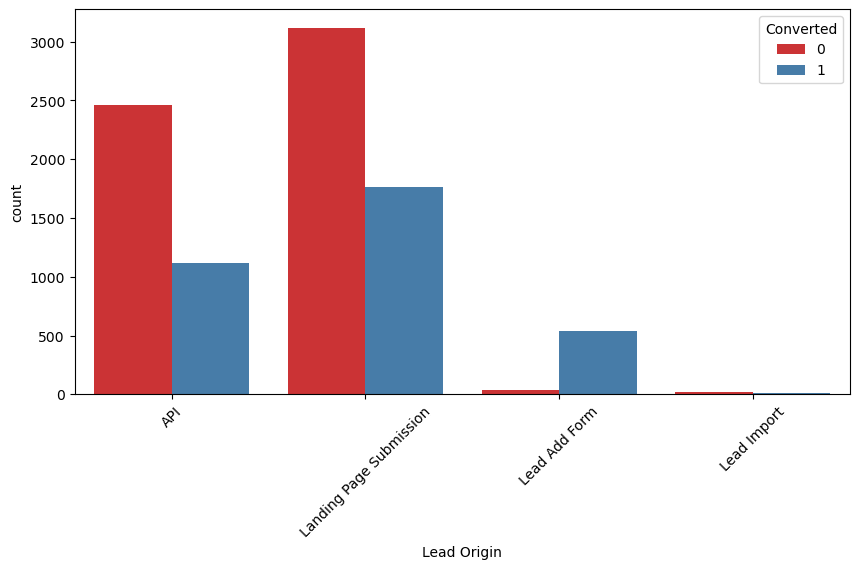

Inference:
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high
3. Lead Import are very less in count.


In [31]:
plt.figure(figsize=(10,5), label='(8) Distribution of column [Lead Origin]')
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)
plt.show()
print("Inference:")
print("1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable")
print("2. Lead Add Form has more than 90% conversion rate but count of lead are not very high")
print("3. Lead Import are very less in count.")

olumn [Lead Source]

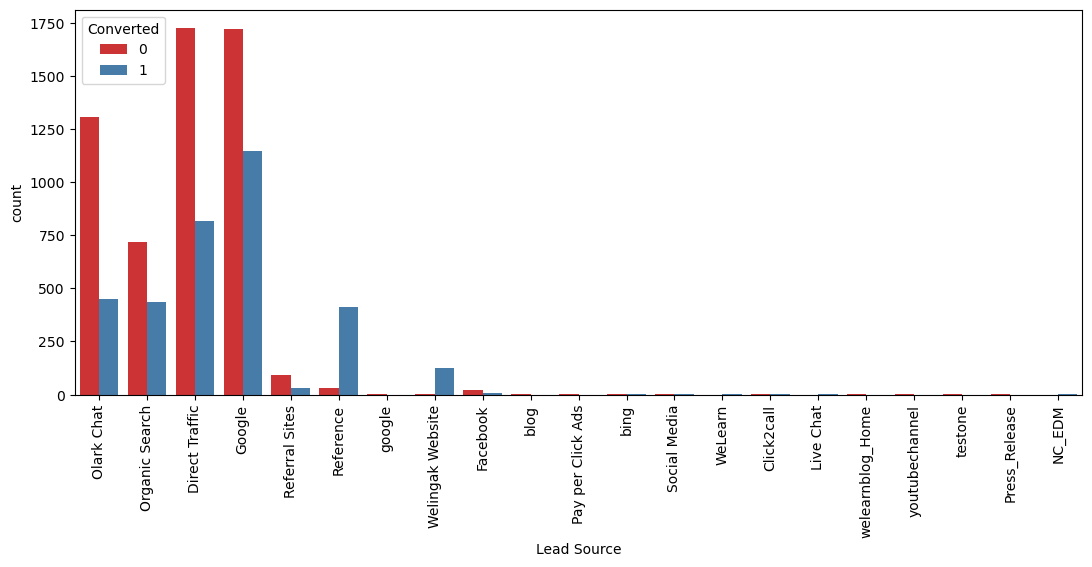

In [32]:
plt.figure(figsize=(13,5), label='(9.a) Distribution of column [Lead Source] before imputing')
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Need to replace 'google' with 'Google'

In [33]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

Creating a new category 'Others' for some of the Lead Sources which do not have much values.

In [34]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

Visualizing again

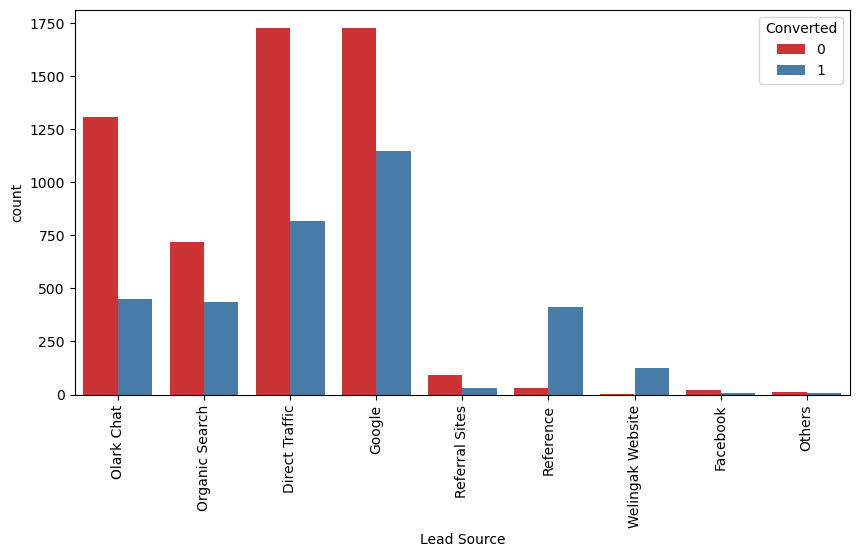

Inference:
1. Google and Direct traffic generates maximum number of leads
2. Conversion Rate of reference leads and leads through welingak website is high


In [35]:
plt.figure(figsize=(10,5), label='(9.b) Distribution of column [Lead Source] after imputing data')
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference:")
print("1. Google and Direct traffic generates maximum number of leads")
print("2. Conversion Rate of reference leads and leads through welingak website is high")

Column [TotalVisits]

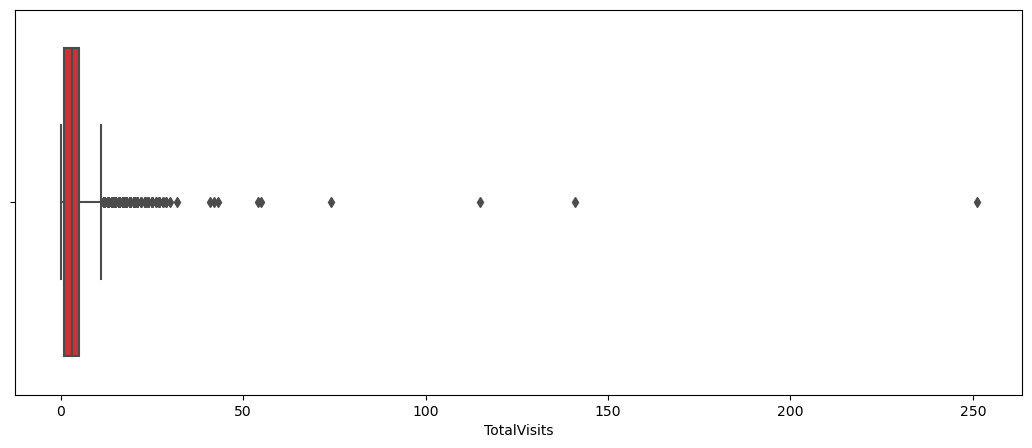

In [36]:
plt.figure(figsize=(13,5), label='(10.a) Box plot for column [TotalVisits] before capping')
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')
plt.show()

In [37]:
print(lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64


we will cap the ouliers to 95%

In [38]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

isualizing again

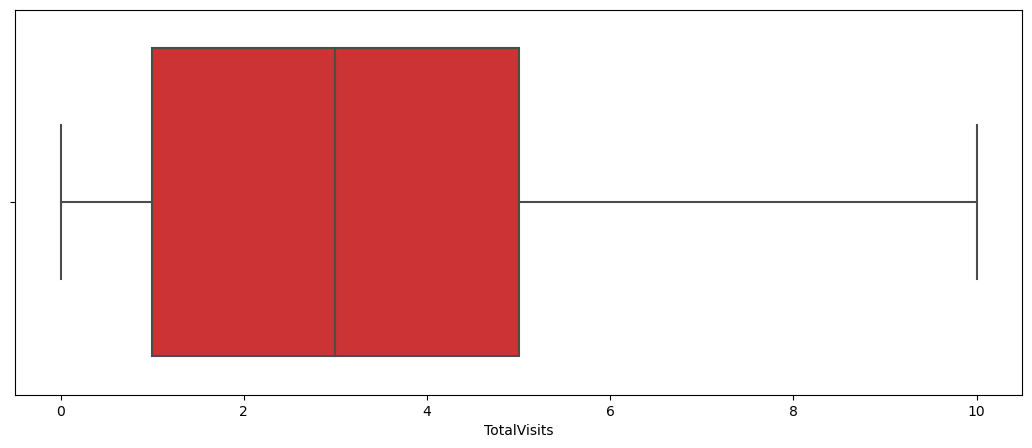

Inference: Median for converted and not converted leads are the same


In [39]:
plt.figure(figsize=(13,5), label='(10.b) Box plot for column [TotalVisits] after capping')
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')
plt.show()
print("Inference: Median for converted and not converted leads are the same")

olumns [Total Time Spent on Website]

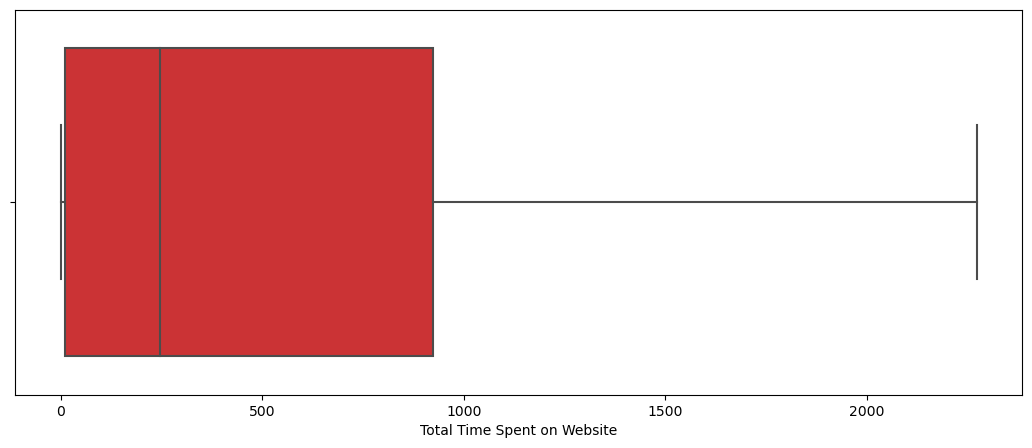

Inference: Leads spending more time on the weblise are more likely to be converted


In [40]:
lead_data['Total Time Spent on Website'].describe()
plt.figure(figsize=(13,5), label='(11) Box plot for column [Total Time Spent on Website] after capping')
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()
print("Inference: Leads spending more time on the weblise are more likely to be converted")

olumn [Page Views Per Visit]

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64


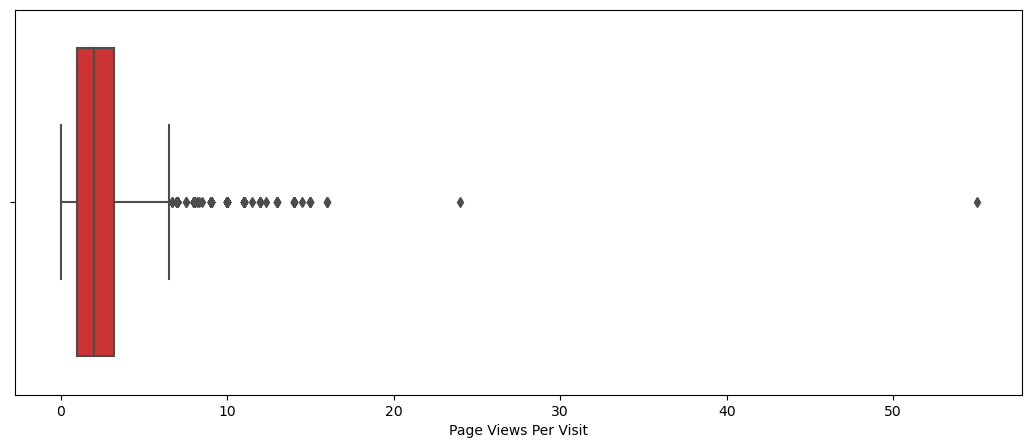

In [41]:
print(lead_data['Page Views Per Visit'].describe())
plt.figure(figsize=(13,5), label='(12.a) Box plot for column [Page Views Per Visit] before capping')
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

s we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

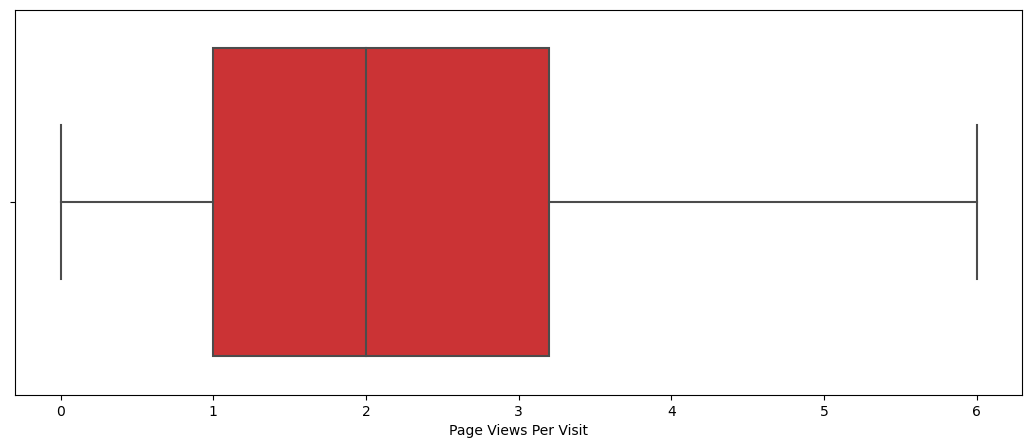

Inference: Median for converted and unconverted leads is the same.


In [42]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
plt.figure(figsize=(13,5), label='(12.b) Box plot for column [Page Views Per Visit] after capping')
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()
print("Inference: Median for converted and unconverted leads is the same.")

olumn [Last Activity]

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object


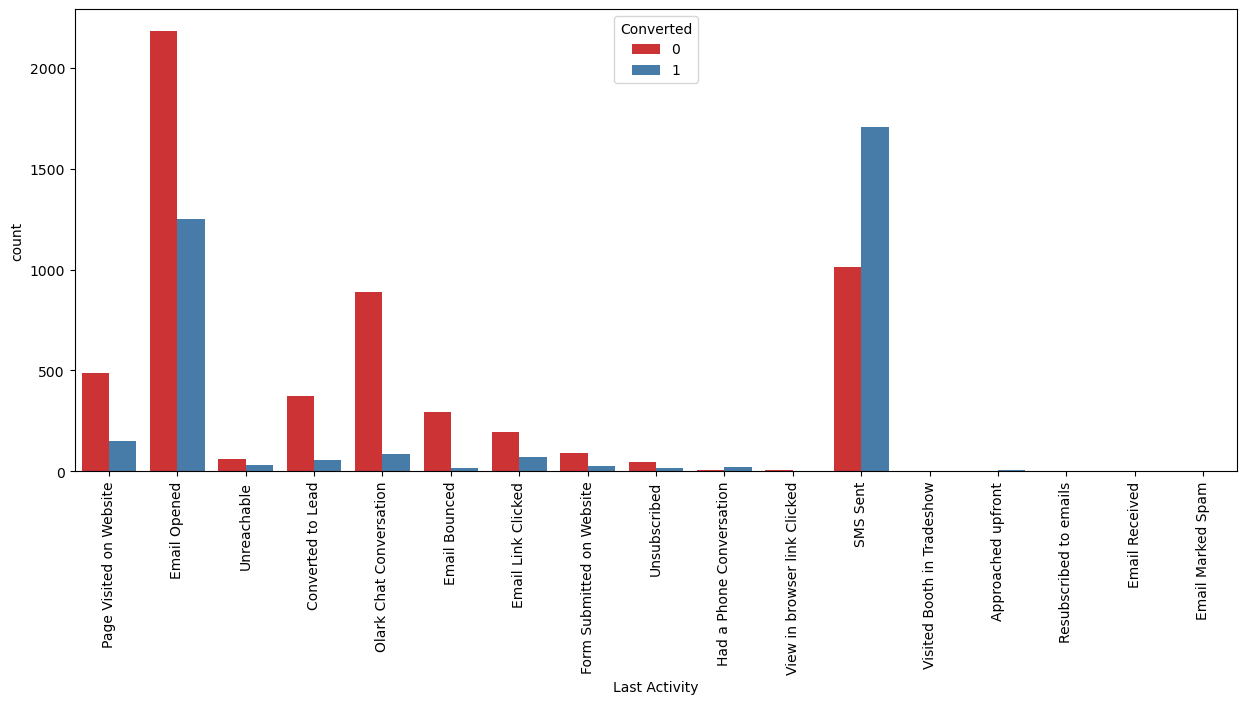

In [43]:
print(lead_data['Last Activity'].describe())
plt.figure(figsize=(15,6), label='(13.a) Bar plot for column [Last Activity] before imputing')
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

We can club the last activities to "Other_Activity" which are having less data.

In [44]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
 'Visited Booth in Tradeshow', 'Approached upfront',
 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

Visualizing again

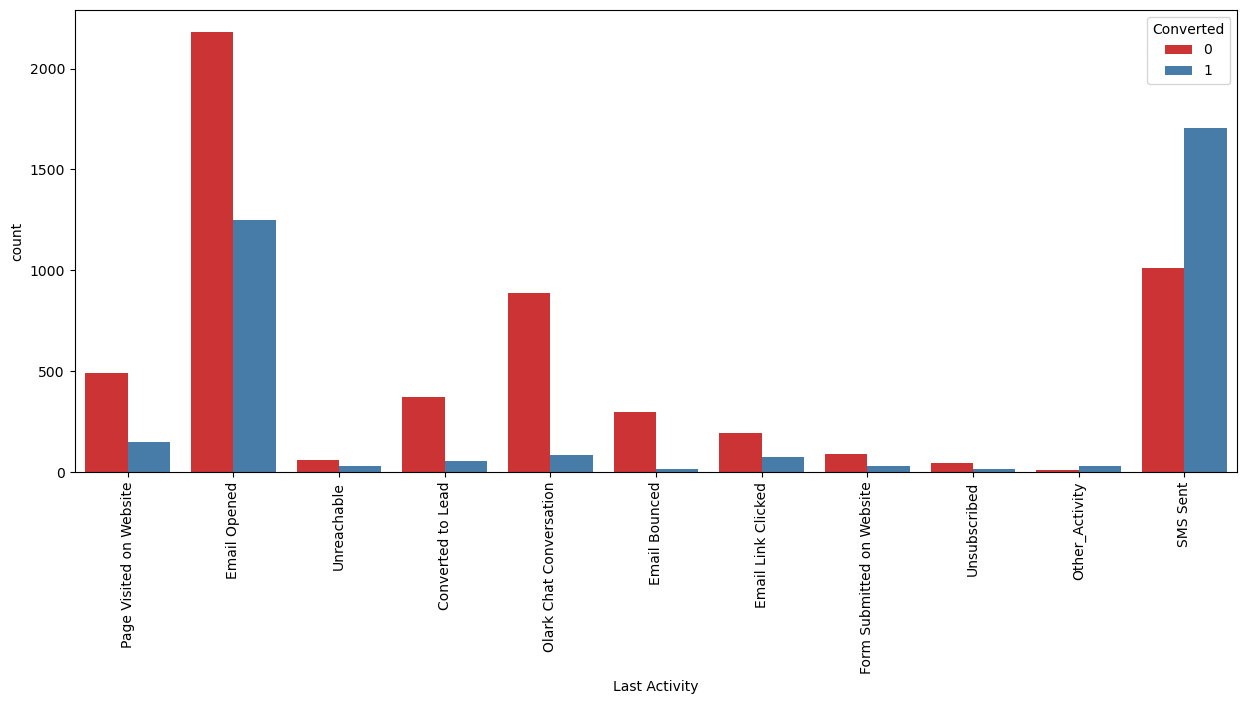

Inference:
1. Most of the lead have their Email opened as their last activity
2. Conversion rate for leads with last activity as SMS Sent is almost 60%


In [45]:
plt.figure(figsize=(15,6), label='(13.b) Bar plot for column [Last Activity] after imputing')
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference:")
print("1. Most of the lead have their Email opened as their last activity")
print("2. Conversion rate for leads with last activity as SMS Sent is almost 60%")

olumns [Country]

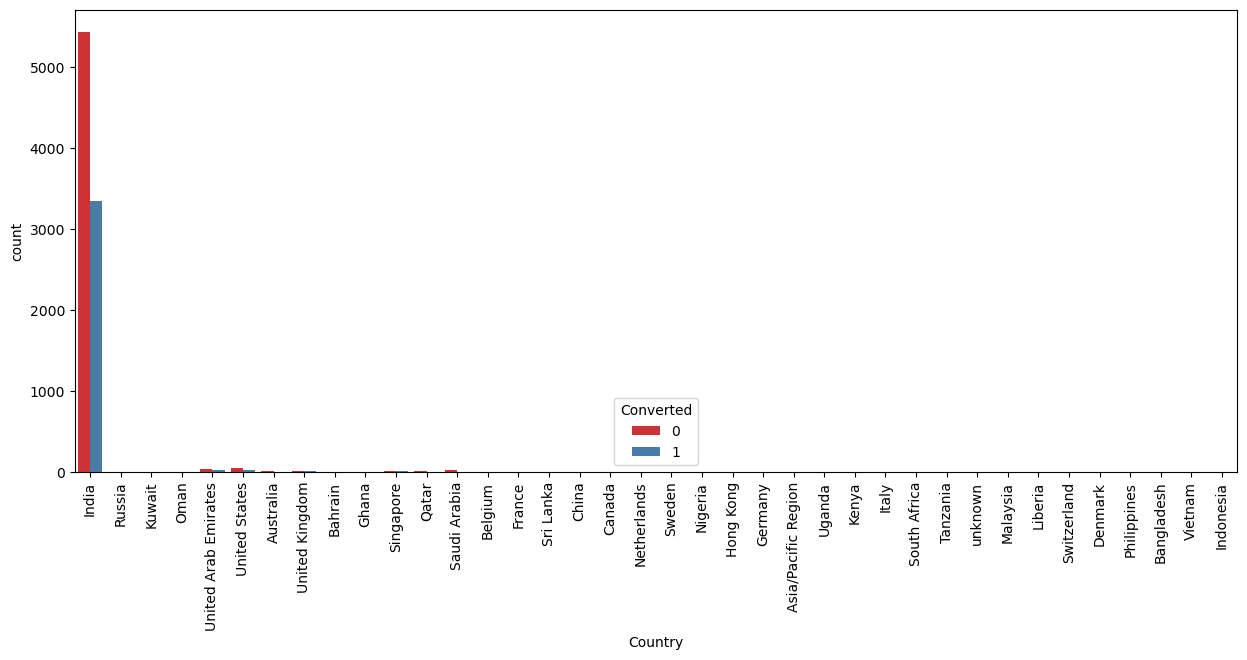

Inference: since all data is skewed for country India. No inference can be drawn on this


In [46]:
plt.figure(figsize=(15,6), label='(14) Bar plot for column [Country]')
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: since all data is skewed for country India. No inference can be drawn on this")

olumns [Specialization]

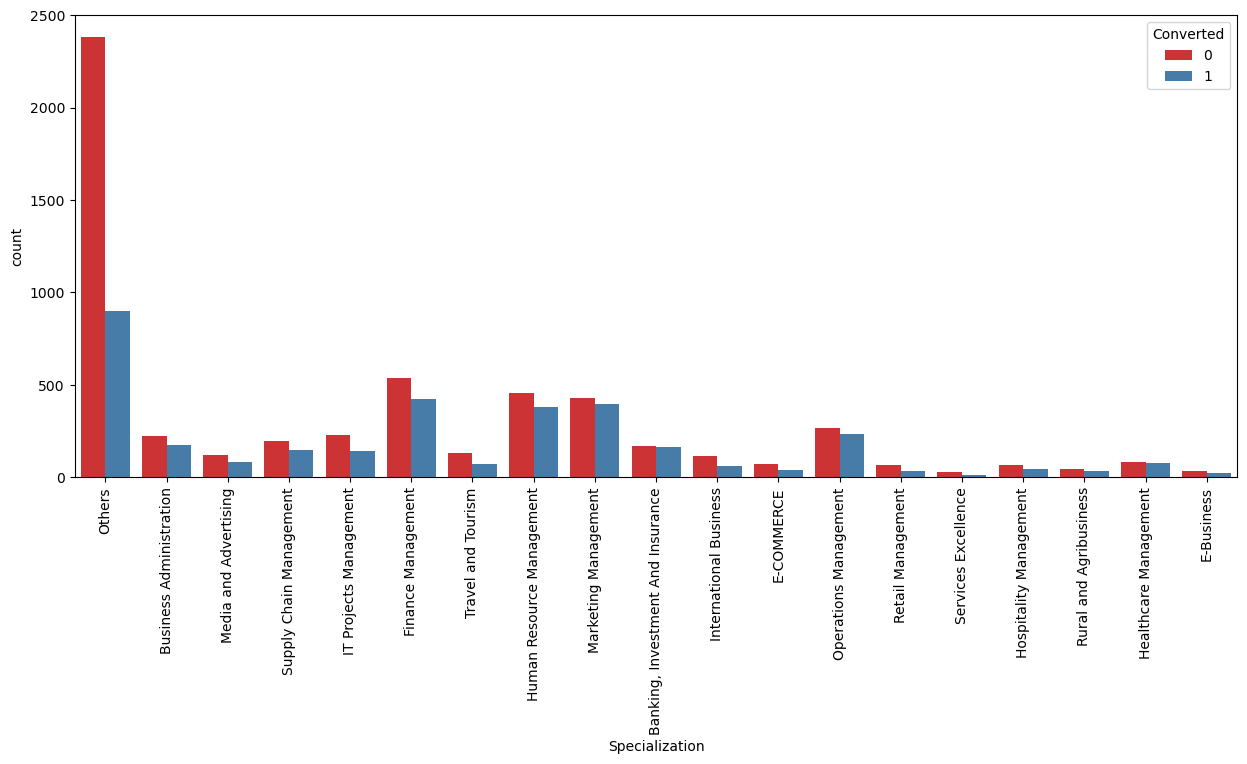

Inference: Focus should be more on the Specialization with high conversion rate


In [47]:
plt.figure(figsize=(15,6), label='(15) Bar plot for column [Specialization]')
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Focus should be more on the Specialization with high conversion rate")

olumn [What is your current occupation]

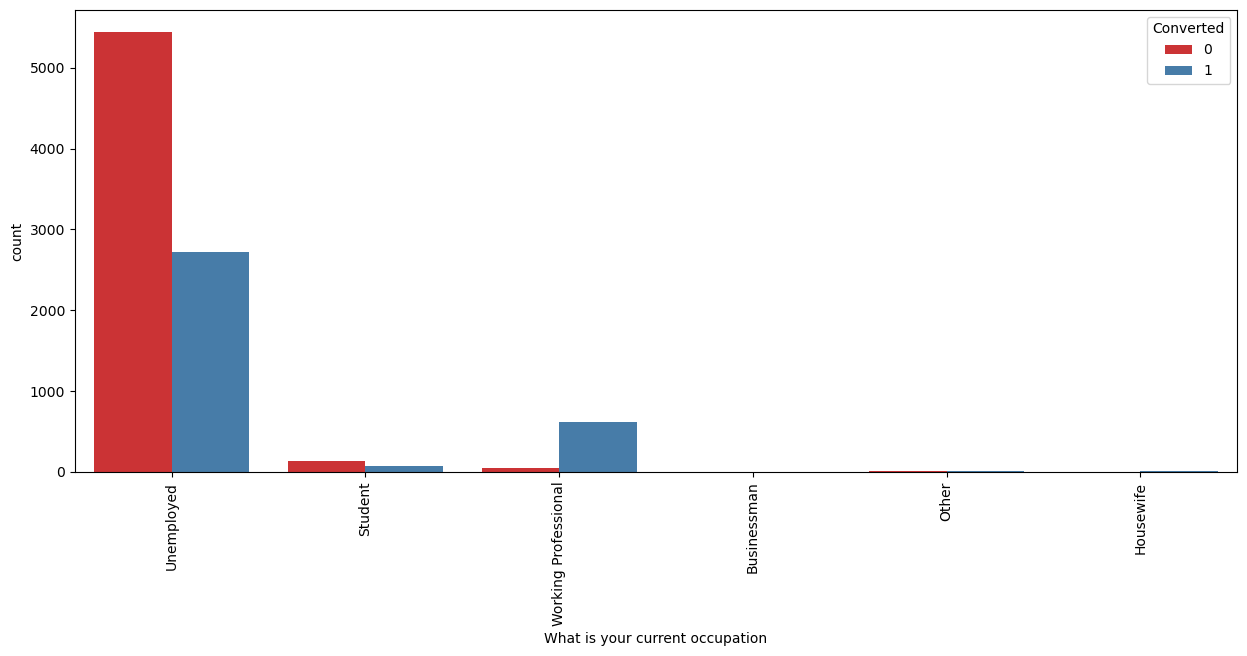

Inference:
1. Working Professionals going for the course have high chances of joining it
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate


In [48]:
plt.figure(figsize=(15,6), label='(16) Bar plot for column [What is your current occupation]')
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference:")
print("1. Working Professionals going for the course have high chances of joining it")
print("2. Unemployed leads are the most in numbers but has around 30-35% conversion rate")

olumn [Search]

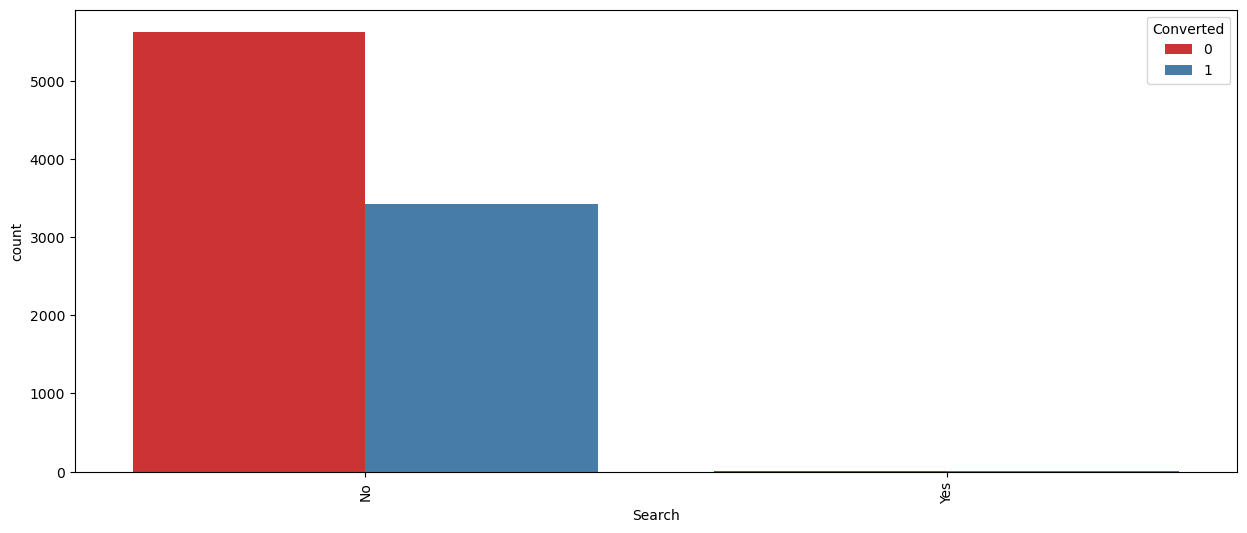

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [49]:
plt.figure(figsize=(15,6), label='(17) Bar plot for column [Search]')
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [Magazine]

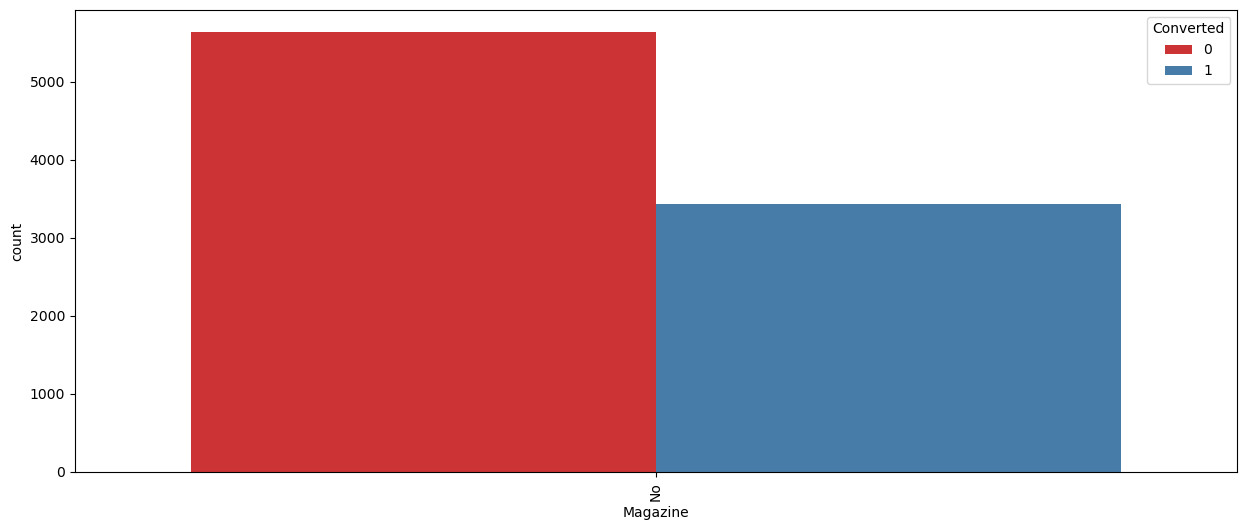

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [50]:
plt.figure(figsize=(15,6), label='(18) Bar plot for column [Magazine]')
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumns [Newspaper Article]

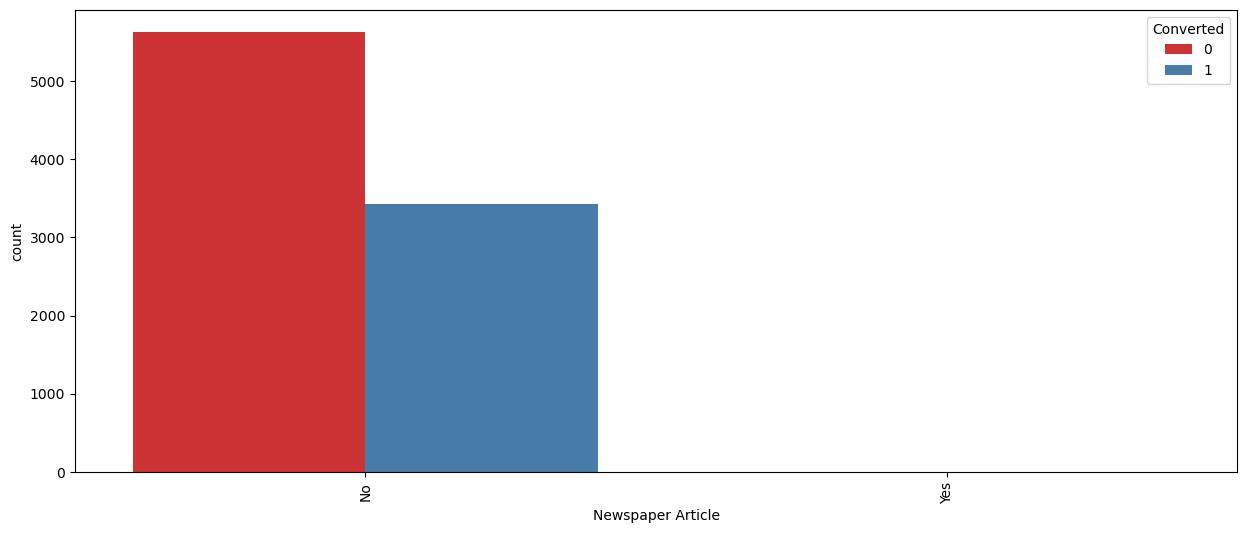

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [51]:
plt.figure(figsize=(15,6), label='(19) Bar plot for column [Newspaper Article]')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn  [X Education Forums]

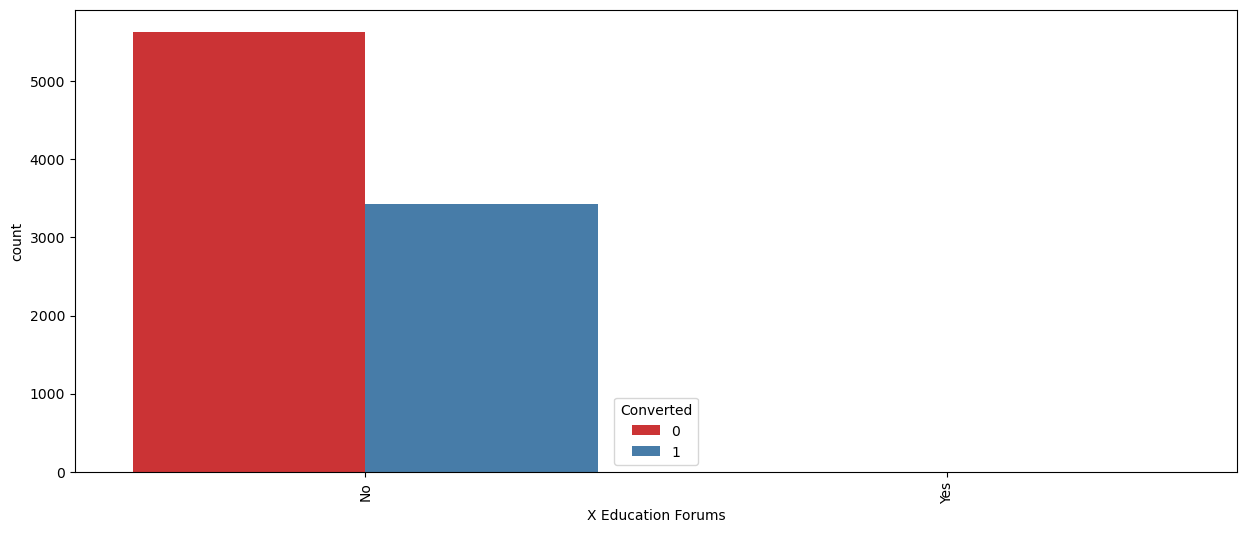

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [52]:
plt.figure(figsize=(15,6), label='(20) Bar plot for column [X Education Forums]')
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumns [Newspaper]

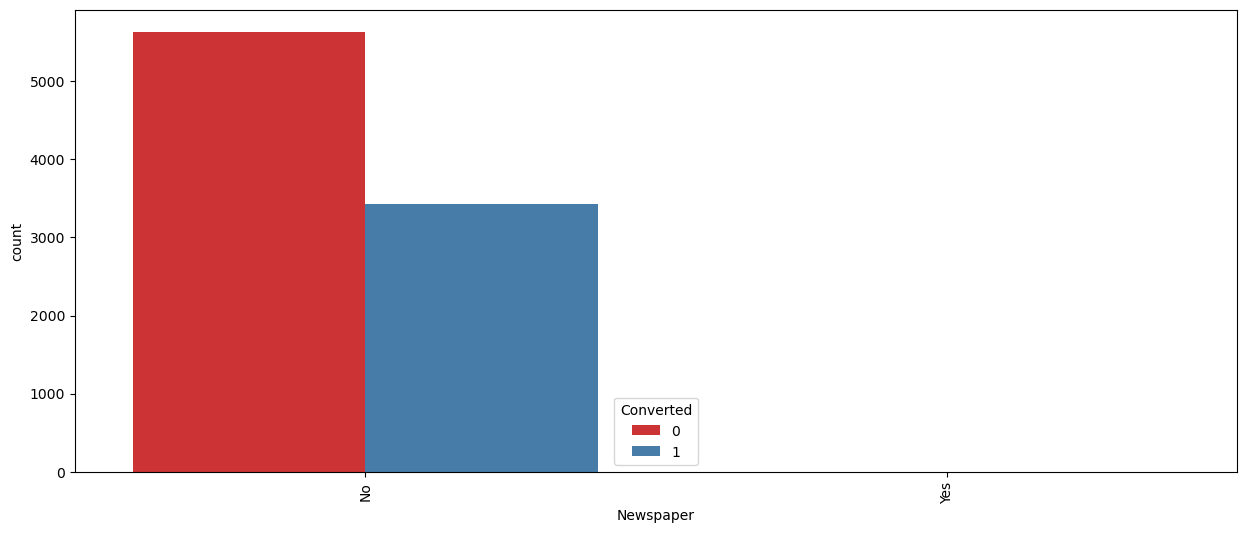

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [53]:
plt.figure(figsize=(15,6), label='(21) Bar plot for column [Newspaper]')
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumns [Digital Advertisement]

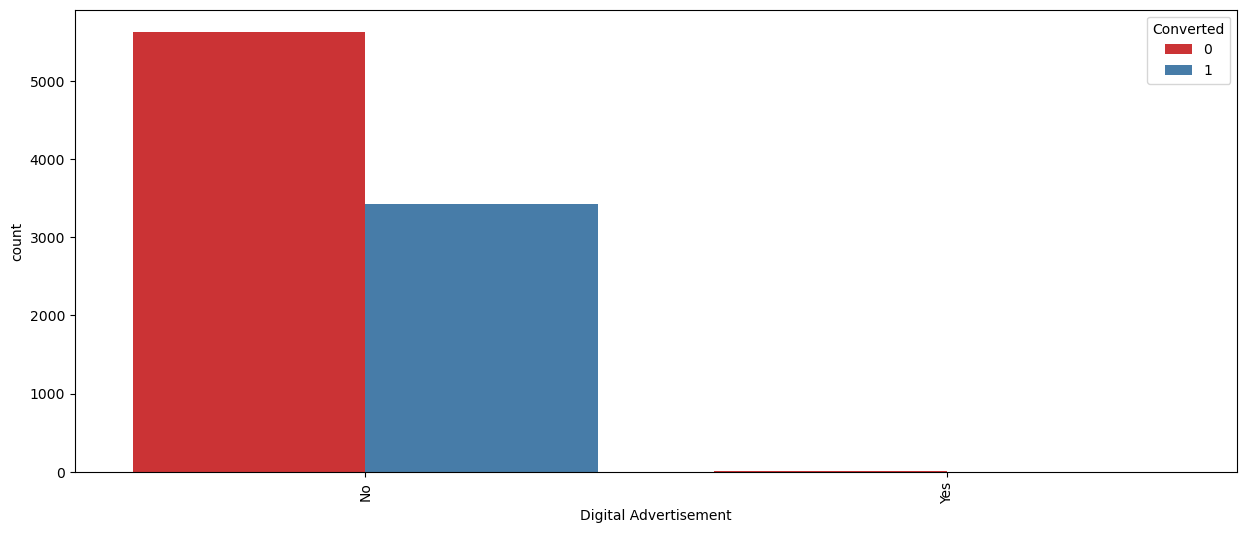

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [54]:
plt.figure(figsize=(15,6), label='(22) Bar plot for column [Digital Advertisement]')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumns [Through Recommendations]

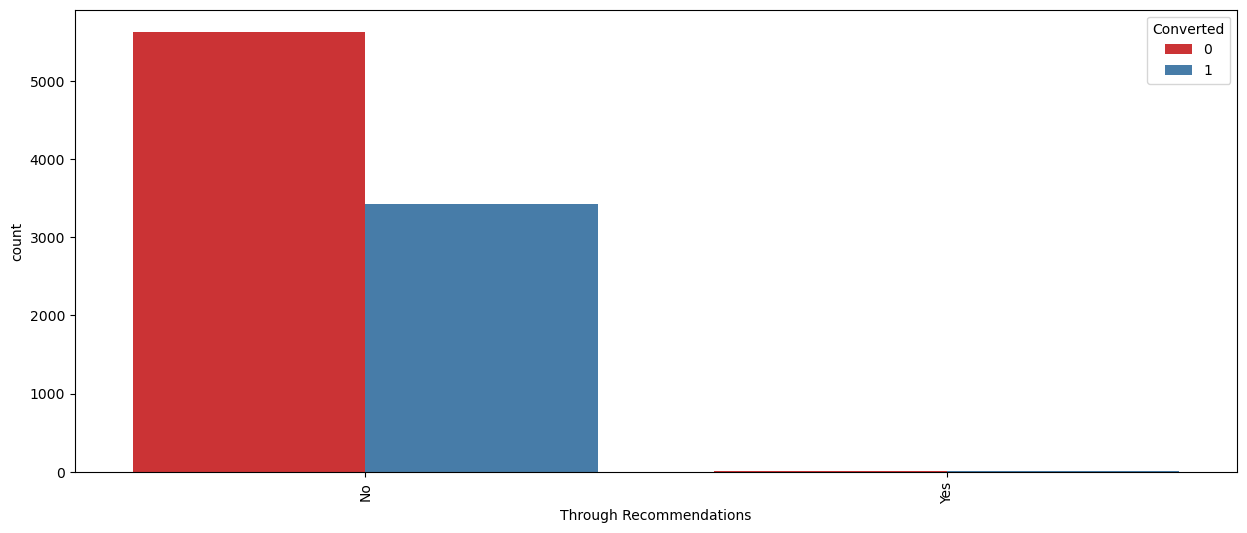

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [55]:
plt.figure(figsize=(15,6), label='(23) Bar plot for column [Through Recommendations]')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [Receive More Updates About Our Courses]

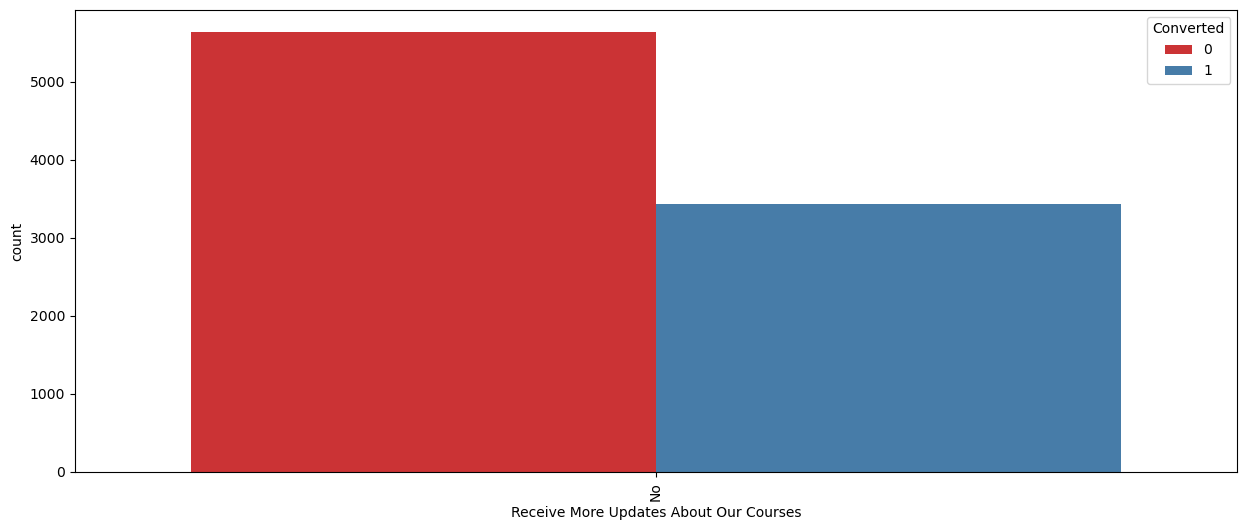

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [56]:
plt.figure(figsize=(15,6), label='(24) Bar plot for column [Receive More Updates About Our Courses]')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [Update me on Supply Chain Content]

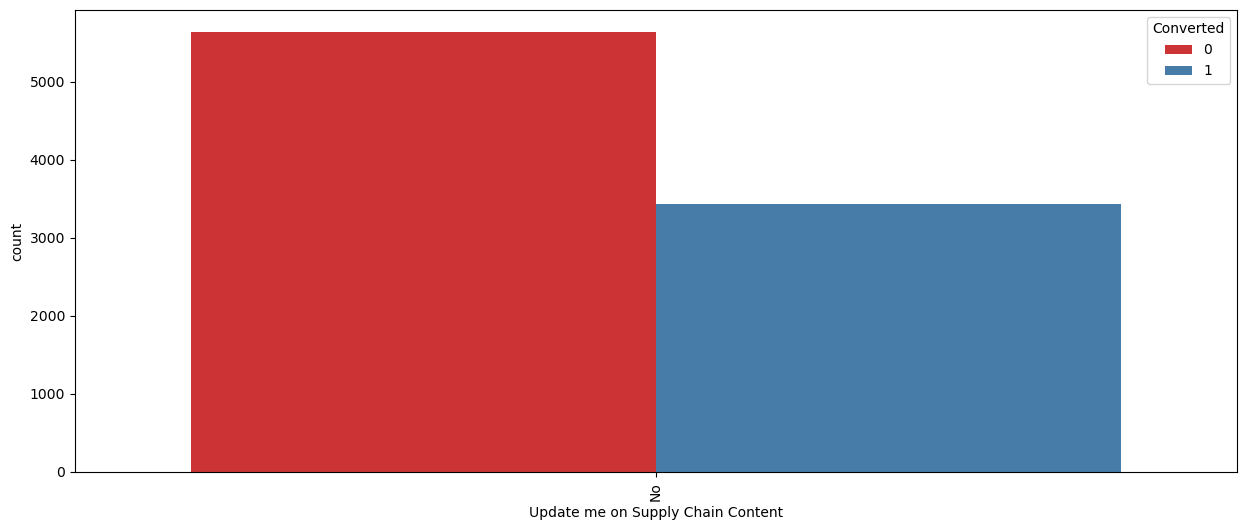

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [57]:
plt.figure(figsize=(15,6), label='(25) Bar plot for column [Update me on Supply Chain Content]')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [Get updates on DM Content]

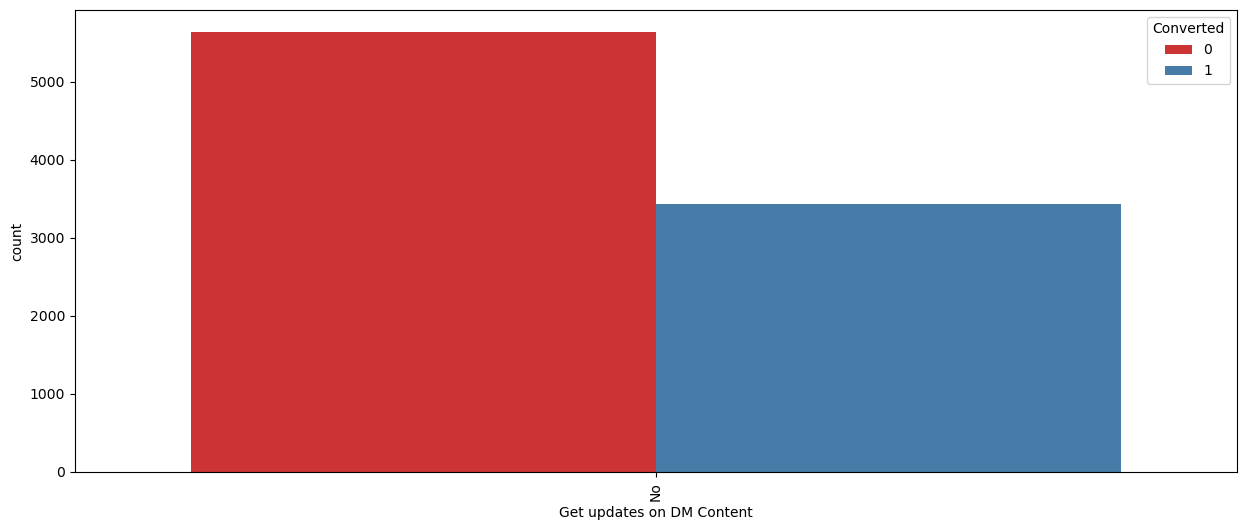

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [58]:
plt.figure(figsize=(15,6), label='(26) Bar plot for column [Get updates on DM Content]')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [City]

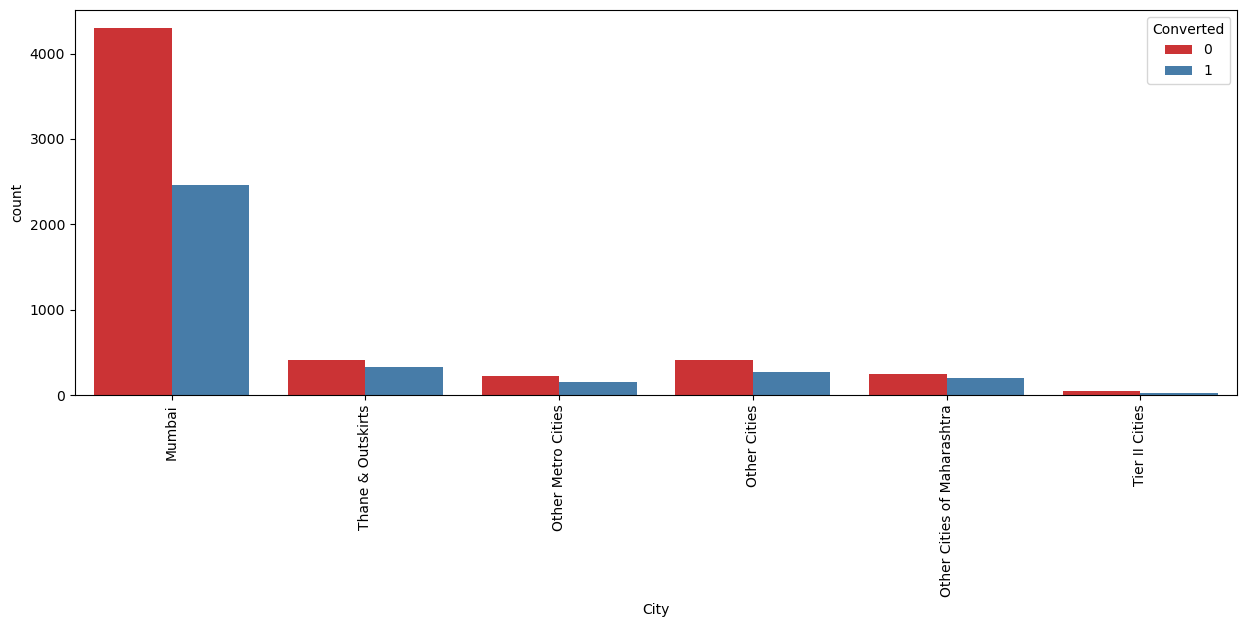

Inference: Most leads are from mumbai with around 50% conversion rate


In [59]:
plt.figure(figsize=(15,5), label='(27) Bar plot for column [City]')
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most leads are from mumbai with around 50% conversion rate")

olumn [I agree to pay the amount through cheque]

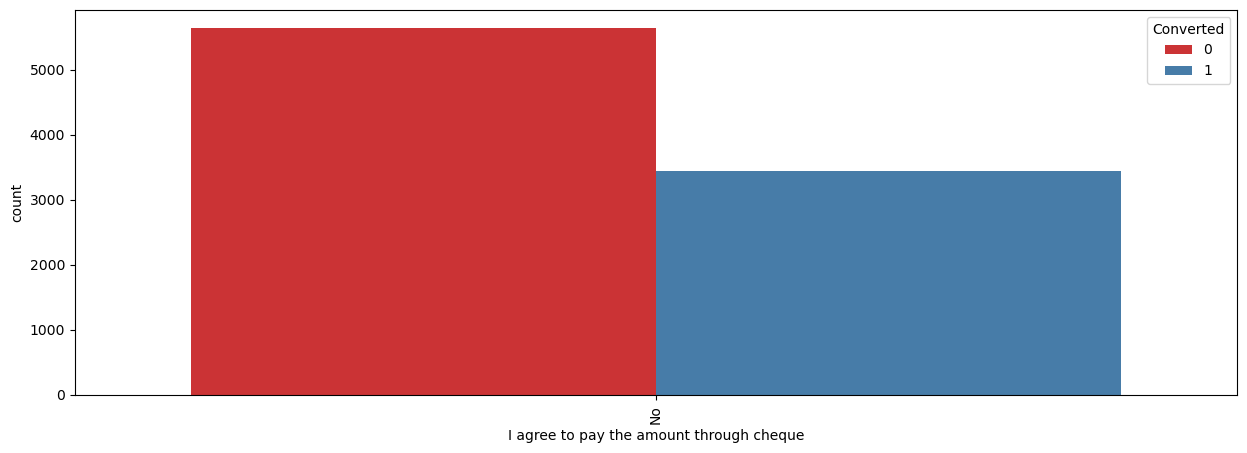

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [60]:
plt.figure(figsize=(15,5), label='(28) Bar plot for column [I agree to pay the amount through cheque]')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [A free copy of Mastering The Interview]

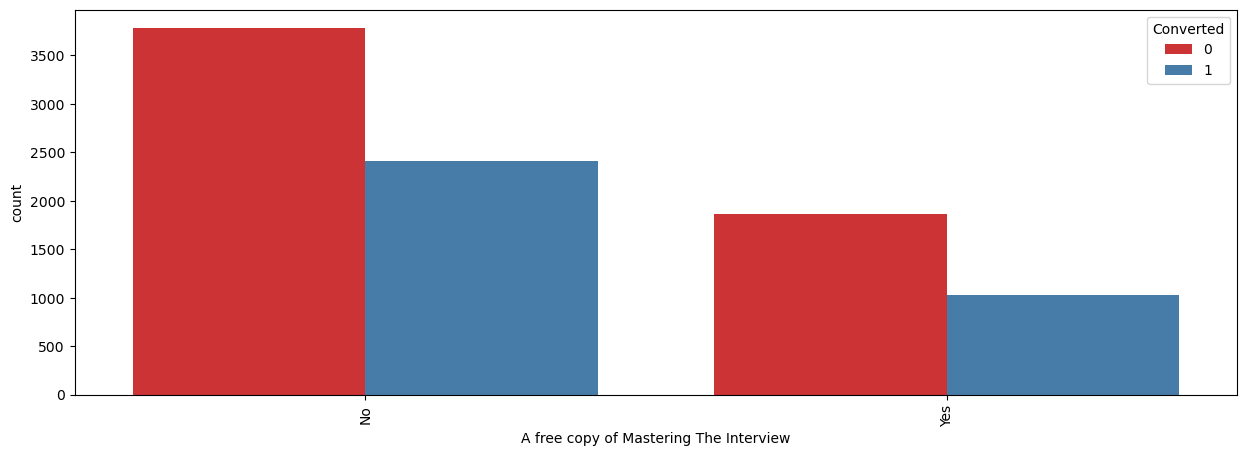

Inference: Most entries are 'No'. No Inference can be drawn with this parameter


In [61]:
plt.figure(figsize=(15,5), label='(29) Bar plot for column [A free copy of Mastering The Interview]')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most entries are 'No'. No Inference can be drawn with this parameter")

olumn [Last Notable Activity]

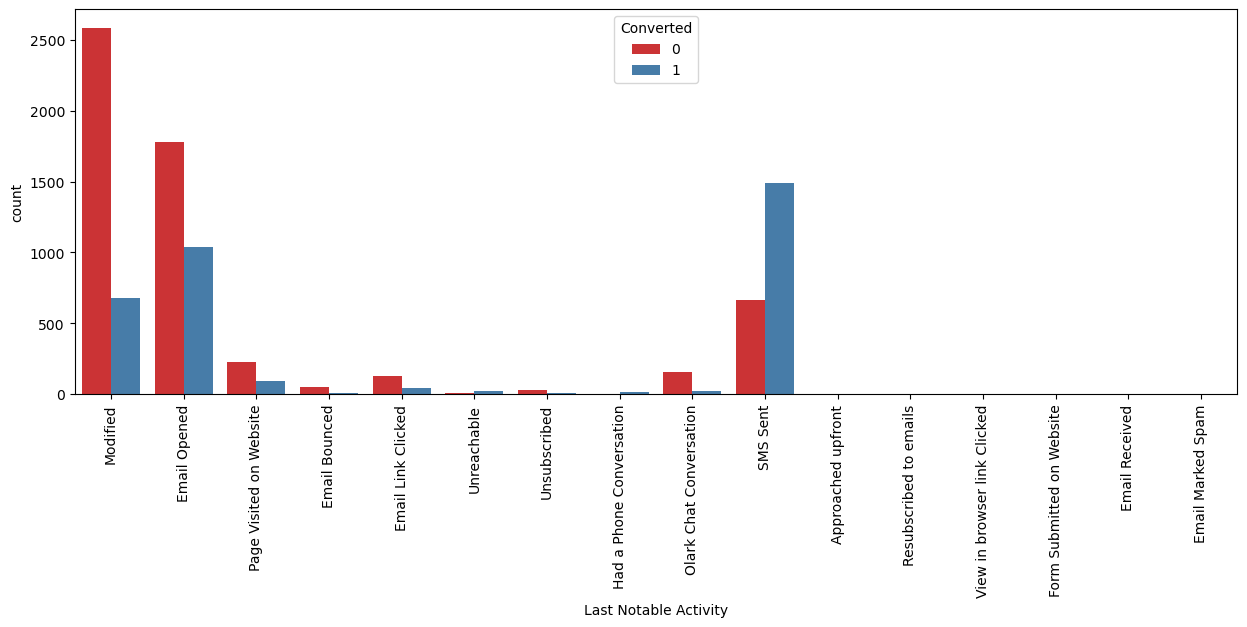

Inference: Most conversion rates are for entries 'Email Opened' and 'SMS Sent'


In [62]:
plt.figure(figsize=(15,5), label='(30) Bar plot for column [Last Notable Activity]')
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()
print("Inference: Most conversion rates are for entries 'Email Opened' and 'SMS Sent'")

ased on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [63]:
lead_data = lead_data.drop(columns=['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [64]:
print("Dataset after cleanup and imputation")
print(lead_data.shape)
print(lead_data.info())

Dataset after cleanup and imputation
(9074, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9

ata Preparation<br>
onverting some binary variables (Yes/No) to 1/0

In [65]:
vars =  ['Do Not Email', 'Do Not Call']

In [66]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [67]:
lead_data[vars] = lead_data[vars].apply(binary_map)

reating Dummy variables for the categorical features ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']

In [68]:
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True,dtype=int)
print(dummy_data.head())

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0  

Concatenating the dummy_data to the lead_data dataframe

In [69]:
lead_data = pd.concat([lead_data, dummy_data], axis=1)
print(lead_data.head())

                            Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website

Dropping the columns for which dummies were created

In [70]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [71]:
print(lead_data.head())

                            Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                            

Splitting the data into train and test set

In [76]:
from sklearn.model_selection import train_test_split

Putting feature variable to X

In [77]:
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
print(X.head())

   Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1           

Putting target variable to y

In [78]:
y = lead_data['Converted']

In [79]:
print(y.head())

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64


Splitting the data into train and test

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Scaling the features

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [84]:
print(X_train.head())

      Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012          

Checking the Lead Conversion rate

In [85]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
print(round(Converted))

38


import statsmodel for Logistic regression model

In [86]:
import statsmodels.api as sm

Feature Selection Using RFE

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [88]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
print(rfe.support_)
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))

[ True False False  True False  True  True  True False False  True False
 False  True False  True False False False False  True  True False  True
 False  True False False False False False False False False False False
 False False  True False False False False False  True False  True  True
  True False False False False False False False False False False False
  True  True False False False False  True False False]
[('Do Not Email', True, 1), ('Do Not Call', False, 9), ('TotalVisits', False, 21), ('Total Time Spent on Website', True, 1), ('Page Views Per Visit', False, 20), ('Lead Origin_Landing Page Submission', True, 1), ('Lead Origin_Lead Add Form', True, 1), ('Lead Origin_Lead Import', True, 1), ('Lead Source_Facebook', False, 24), ('Lead Source_Google', False, 25), ('Lead Source_Olark Chat', True, 1), ('Lead Source_Organic Search', False, 36), ('Lead Source_Others', False, 28), ('Lead Source_Reference', True, 1), ('Lead Source_Referral Sites', False, 48), ('Lead Source_Welingak 

Viewing columns selected by RFE

In [90]:
cols = X_train.columns[rfe.support_]
print(cols)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


Model Building<br>
Assessing the model with StatsModels<br>
Model-1

In [91]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 19 Sep 2023   Deviance:                       5180.6
Time:                        04:59:07   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Dropping the column 'What is your current occupation_Housewife' as its pvalue is very high

In [92]:
col1 = cols.drop('What is your current occupation_Housewife')

Model-2

In [93]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,np.asarray(X_train_sm), family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 19 Sep 2023   Deviance:                       5184.5
Time:                        04:59:11   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3160      0.590      2.230      0.0

ince Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column

In [94]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

Model-3

In [95]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,np.asarray(X_train_sm), family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 19 Sep 2023   Deviance:                       5186.1
Time:                        04:59:15   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3199      0.590      2.235      0.0

ince Pvalue of 'What is your current occupation_Student' is very high, we can drop this column

In [96]:
col1 = col1.drop('What is your current occupation_Student')

Model-4

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,np.asarray(X_train_sm), family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 19 Sep 2023   Deviance:                       5189.0
Time:                        04:59:18   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4409      0.240      1.836      0.0

ince Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column

In [98]:
col1 = col1.drop('Lead Origin_Lead Add Form')

Model-5

In [99]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,np.asarray(X_train_sm), family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 19 Sep 2023   Deviance:                       5192.3
Time:                        04:59:21   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4578      0.240      1.907      0.0

ow all the column pvalues are in limit

Check for the VIF values of the feature variables. 

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
12         What is your current occupation_Unemployed  9.72
2                 Lead Origin_Landing Page Submission  5.74
11                              Specialization_Others  3.99
4                              Lead Source_Olark Chat  2.24
14                     Last Notable Activity_Modified  1.86
13  What is your current occupation_Working Profes...  1.66
9                              Last Activity_SMS Sent  1.63
7               Last Activity_Olark Chat Conversation  1.59
5                               Lead Source_Reference  1.46
1                         Total Time Spent on Website  1.32
0                                        Do Not Email  1.21
6                        Lead Source_Welingak Website  1.11
10                         Last Activity_Unsubscribed  1.08
3                             Lead Origin_Lead Import  1.03
8                        Last Activity_Other_Activity  1.01
15                  Last Notable Activit

Dropping the column  'What is your current occupation_Unemployed' because it has high VIF

In [102]:
col1 = col1.drop('What is your current occupation_Unemployed')

Model-6

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Tue, 19 Sep 2023   Deviance:                       5200.0
Time:                        04:59:27   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue

In [104]:
col1 = col1.drop('Lead Origin_Lead Import')

Model-7

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 19 Sep 2023   Deviance:                       5203.0
Time:                        04:59:29   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Check for the VIF values of the feature variables. 

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
10                              Specialization_Others  2.17
3                              Lead Source_Olark Chat  2.03
12                     Last Notable Activity_Modified  1.79
2                 Lead Origin_Landing Page Submission  1.70
6               Last Activity_Olark Chat Conversation  1.59
8                              Last Activity_SMS Sent  1.57
1                         Total Time Spent on Website  1.29
4                               Lead Source_Reference  1.24
0                                        Do Not Email  1.21
11  What is your current occupation_Working Profes...  1.19
5                        Lead Source_Welingak Website  1.09
9                          Last Activity_Unsubscribed  1.08
7                        Last Activity_Other_Activity  1.01
13                  Last Notable Activity_Unreachable  1.01


Dropping the column  'Last Activity_Unsubscribed' to reduce the variables

In [108]:
col1 = col1.drop('Last Activity_Unsubscribed')

Model-8

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Tue, 19 Sep 2023   Deviance:                       5210.2
Time:                        04:59:36   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Check for the VIF values of the feature variables. 

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9                               Specialization_Others  2.17
3                              Lead Source_Olark Chat  2.03
11                     Last Notable Activity_Modified  1.78
2                 Lead Origin_Landing Page Submission  1.70
6               Last Activity_Olark Chat Conversation  1.59
8                              Last Activity_SMS Sent  1.57
1                         Total Time Spent on Website  1.29
4                               Lead Source_Reference  1.24
10  What is your current occupation_Working Profes...  1.19
0                                        Do Not Email  1.13
5                        Lead Source_Welingak Website  1.09
7                        Last Activity_Other_Activity  1.01
12                  Last Notable Activity_Unreachable  1.01


Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables

In [112]:
col1 = col1.drop('Last Notable Activity_Unreachable')

Model-9

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Tue, 19 Sep 2023   Deviance:                       5221.0
Time:                        04:59:42   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9                               Specialization_Others  2.16
3                              Lead Source_Olark Chat  2.03
11                     Last Notable Activity_Modified  1.78
2                 Lead Origin_Landing Page Submission  1.69
6               Last Activity_Olark Chat Conversation  1.59
8                              Last Activity_SMS Sent  1.56
1                         Total Time Spent on Website  1.29
4                               Lead Source_Reference  1.24
10  What is your current occupation_Working Profes...  1.18
0                                        Do Not Email  1.13
5                        Lead Source_Welingak Website  1.09
7                        Last Activity_Other_Activity  1.01


ince the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

Making Prediction on the Train set

Getting the predicted values on the train set

In [115]:
y_train_pred = res.predict(X_train_sm)
print(y_train_pred[:10])

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64


Reshaping into an array

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
print(y_train_pred[:10])

[0.19669707 0.12574636 0.32347712 0.86561739 0.79775204 0.74400101
 0.10002735 0.96584525 0.85451189 0.76807088]


reating a dataframe with the actual Converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
print(y_train_pred_final.head())

   Converted  Converted_prob  Prospect ID
0          0        0.196697         3009
1          0        0.125746         1012
2          0        0.323477         9226
3          1        0.865617         4750
4          1        0.797752         7987


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

Let's see the head

In [119]:
print(y_train_pred_final.head())

   Converted  Converted_prob  Prospect ID  predicted
0          0        0.196697         3009          0
1          0        0.125746         1012          0
2          0        0.323477         9226          0
3          1        0.865617         4750          1
4          1        0.797752         7987          1


In [120]:
from sklearn import metrics

Confusion matrix 

In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


Let's check the overall accuracy.

In [122]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


Metrics beyond simply accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity of our logistic regression model

In [124]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7060506950122649


Let us calculate specificity

In [125]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


Calculate false postive rate - predicting converted lead when the lead actually was not converted

In [126]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11370038412291933


positive predictive value 

In [127]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7954859511745739


Negative predictive value

In [128]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8279904306220096


We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. <br>
Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

In [129]:
def draw_roc(figure_number, actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5), label=figure_number+" ROC curve")
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

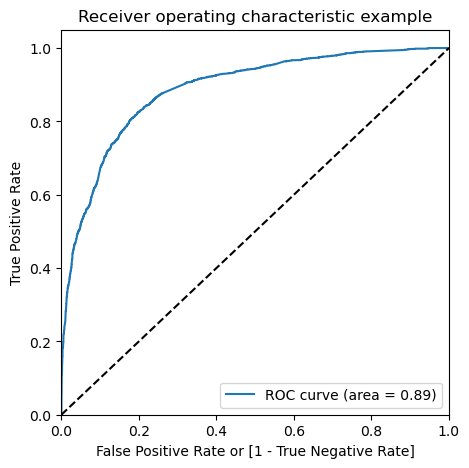

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc("(31)",y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

inding Optimal Cutoff Point<br>
Let's create columns with different probability cutoffs 

In [131]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [132]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

TP = confusion[1,1] # true positive <br>
TN = confusion[0,0] # true negatives<br>
FP = confusion[0,1] # false positives<br>
FN = confusion[1,0] # false negatives

In [133]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


Let's plot accuracy sensitivity and specificity for various probabilities.

<Figure size 1500x500 with 0 Axes>

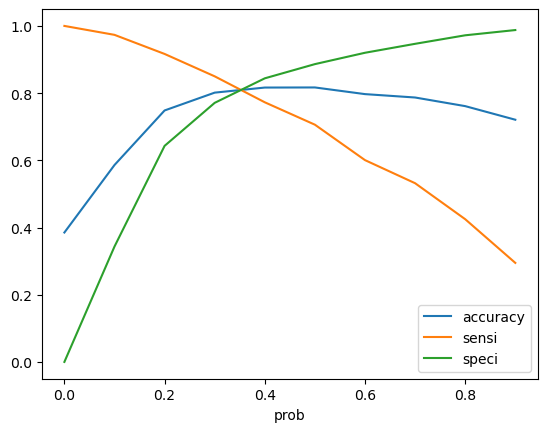

In [134]:
plt.figure(figsize=(15,5), label='(32) accuracy sensitivity and specificity for various probabilities.')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

rom the curve above, 0.34 is the optimum point to take it as a cutoff probability

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

In [136]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


Assigning Lead Score to the Training data

In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

In [138]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


Model Evaluation

Let's check the overall accuracy.

In [139]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


Confusion matrix

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]])

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [142]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8172526573998364


Let us calculate specificity

In [143]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8069142125480153


Calculate false postive rate - predicting converted lead when the lead was actually not have converted

In [144]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19308578745198463


Positive predictive value 

In [145]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7261169633127498


Negative predictive value

In [146]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8757643135075042


Precision and Recall

ooking at the confusion matrix again

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


Precision

In [148]:
TP / TP + FP

755.0

In [149]:
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7954859511745739


Recall

In [150]:
TP / TP + FN

448.0

In [151]:
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7060506950122649


Precision and Recall using sklearn libraries

In [152]:
from sklearn.metrics import precision_score, recall_score

In [153]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7954859511745739
Recall : 0.7060506950122649


recision and recall tradeoff

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

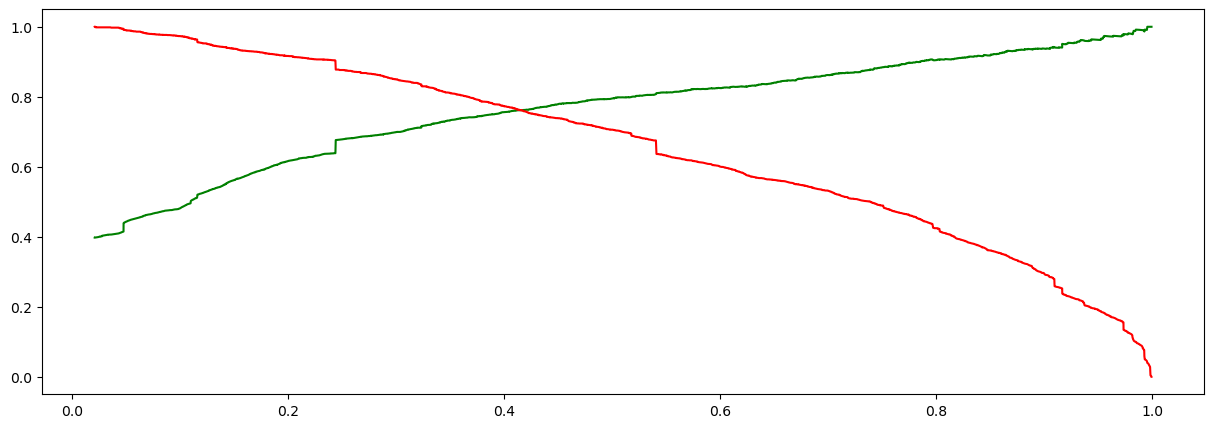

In [157]:
plt.figure(figsize=(15,5), label='(33) trade-off curve between precision and recall')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [158]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
print(X_test.head())

      Do Not Email  Total Time Spent on Website  \
3271             0                    -0.600595   
1490             0                     1.887326   
7936             0                    -0.752879   
4216             0                    -0.888650   
3830             0                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
3271                                    0                       0   
1490                                    1                       0   
7936                                    0                       0   
4216                                    0                       0   
3830                                    1                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3271                      0                             0   
1490                      0                             0   
7936                      0                             0   
4216                      1       

Adding a const

In [159]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [160]:
y_test_pred = res.predict(X_test_sm)
print(y_test_pred[:10])
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
print(y_pred_1.head())
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
print(y_pred_final.head())
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
# Let's see the head of y_pred_final
print(y_pred_final.head())

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64
             0
3271  0.130342
1490  0.969057
7936  0.112570
4216  0.802999
3830  0.132924
   Converted  Prospect ID         0
0          0         3271  0.130342
1          1         1490  0.969057
2          0         7936  0.112570
3          1         4216  0.802999
4          0         3830  0.132924
   Prospect ID  Converted  Converted_prob
0         3271          0        0.130342
1         1490          1        0.969057
2         7936          0        0.112570
3         4216          1        0.802999
4         3830          0        0.132924


In [161]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
print(y_pred_final.head())

   Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.130342                0
1         1490          1        0.969057                1
2         7936          0        0.112570                0
3         4216          1        0.802999                1
4         3830          0        0.132924                0


Let's check the overall accuracy.

In [162]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


Making the confusion matrix

In [163]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 193,  796]])

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [165]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


Let us calculate specificity

In [166]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8050749711649365


In [167]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [168]:
print(y_pred_final.head())

   Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
0         3271          0        0.130342                0          13
1         1490          1        0.969057                1          97
2         7936          0        0.112570                0          11
3         4216          1        0.802999                1          80
4         3830          0        0.132924                0          13


Finding out the leads which should be contacted

In [169]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
print(hot_leads)

      Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
1            1490          1        0.969057                1          97
8            4223          1        0.916621                1          92
16           1946          1        0.924467                1          92
21           2461          1        0.992551                1          99
23           5822          1        0.997991                1         100
...           ...        ...             ...              ...         ...
2694         1566          1        0.947723                1          95
2699         6461          1        0.961562                1          96
2703         5741          1        0.908283                1          91
2715         6299          1        0.871977                1          87
2720         6501          1        0.854745                1          85

[368 rows x 5 columns]


In [170]:
print("The Prospect ID of the customers which should be contacted are :")

The Prospect ID of the customers which should be contacted are :


In [171]:
hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
print(hot_leads_ids)

[1490 4223 1946 2461 5822 2684 2010 4062 7696 9049 1518 4543 4830 4365
 3542 2504 7674 8596 4003 4963 6947 4807  446  789 8372 5805 3758 1561
 5367  737 6423 8286 7174 4461 1436 7552 3932 4080 1475 5785 2860 7253
 4297 5490 1995 4498 5797 8687  831 7653 2018 6743 3976 5769 1051 1663
 3288 8959 7521 8282 8213 9063 5292 6913 1481  785 3265 3285 7433 3858
 3810 2009 8106  373 7417 4179 8568 7268 6784 6754 7236 2960 7753 3983
  802 8745 4717  505 8509 6094 4992 7036 2680 7065  112 6149 7157 7175
 1675 6999 5826 8492 6499 2481 3439 4612 7129 4793 4837 2495  822 8111
 2378 5075 7699 5638 2342 8077 2727  720 7489 2961 1542 5656 2630 6728
 8205 6332 8461 2427 5087  174 2674 8065 2095 1568 8597 4865 3535 4708
 1304 6066 6538 5700 1388 5815 7970 7902 5804 7805 5042 4081 6684 5440
 1927 5032 5824   64 2650 5808 4578 4803 1470 5810 2473 2584 2578 7259
 3727 1454 6064 3150 2118 4403 3194 8475 1200 2575 1299 1525 4613 4909
 8204 4772 1374 8888 8082 4862 1595 8942 1899 8474 3463 2022 7893 3248
 6486 

inding out the Important Features from our final model

In [172]:
print(res.params.sort_values(ascending=False))

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Others                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64
